## **Project 4 - Ensemble Techniques**

### **Title**: *Travel Package Purchase Prediction*

### **Author**: *Pankaj Singh*

<br>

**Domain** 

Market analytics/Customer prediction

**Project Context**

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, it was difficult to identify the potential customers because customers were contacted at random without looking at the available information.


The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

This time company wants to harness the available data of existing and potential customers to target the right customers.

You as a Data Scientist at "Visit with us" travel company has to analyze the customers' data and information to provide recommendations to the Policy Maker and build a model to predict the potential customer who is going to purchase the newly introduced travel package. The model will be built to make predictions before a customer is contacted.

**Data Description** 

The data contains the different attributes of customers and if they accepted the package. 

**Customer Information** 

- **`CustomerID`** : Unique customer ID <br>
- **`ProdTaken`** : Whether the customer has purchased a package or not (0: No, 1: Yes) <br>
- **`Age`** : Age of customer <br>
- **`TypeofContact`** : How customer was contacted (Company Invited or Self Inquiry) <br>
- **`CityTier`** : City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3. It's the city the customer lives in <br>
- **`Occupation`** : Occupation of customer <br>
- **`Gender`** : Gender of customer <br>
- **`NumberOfPersonVisiting`** : Total number of persons planning to take the trip with the customer <br>
- **`PreferredPropertyStar`** : Preferred hotel property rating by customer <br>
- **`MaritalStatus`** : Marital status of customer <br>
- **`NumberOfTrips`** : Average number of trips in a year by customer <br>
- **`Passport`** : The customer has a passport or not (0: No, 1: Yes) <br>
- **`OwnCar`** : Whether the customers own a car or not (0: No, 1: Yes) <br>
- **`NumberOfChildrenVisiting`** : Total number of children with age less than 5 planning to take the trip with the customer <br>
- **`Designation`** : Designation of the customer in the current organization <br>
- **`MonthlyIncome`** : Gross monthly income of the customer <br>

**Customer Interaction Information** 

- **`PitchSatisfactionScore`** : Sales pitch satisfaction score <br>
- **`ProductPitched`** : Product pitched by the salesperson <br>
- **`NumberOfFollowups`** : Total number of follow-ups has been done by the salesperson after the sales pitch <br>
- **`DurationOfPitch`** : Duration of the pitch by a salesperson to the customer <br>


**Project Deliverables**

- To predict which customer is more likely to purchase the newly introduced travel package.

**Learning Objective**

- Exploratory Data Analysis and insights
- Data pre-processing
- Build Bagging classifier, Random Forest, and Decision Tree
    - Model performance improvement and comaprisons
- Build Boosting classifier: AdaBoost, Gradient Boosting, XGBoost and Stacking
    - Model performance improvement and comaprisons

## 1. **Import Libraries**

In [288]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
)
from sklearn.model_selection import GridSearchCV

pd.set_option("display.float_format", lambda x: "%.3f" % x)
pd.set_option("display.max_rows", 300)
pd.set_option("display.max_colwidth", 400)
pd.set_option("display.max_columns", None)

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

## 2. **Load data \& get a first glimpse**

In [289]:
# Load data from csv file
data = pd.read_excel("Tourism.xlsx", sheet_name="Tourism")
tourist = data.copy()

<IPython.core.display.Javascript object>

- #### Shape of the dataset

In [290]:
## Print out the shape of the dataset
tourist.shape

(4888, 20)

<IPython.core.display.Javascript object>

- So we have 4888 entries of our data
- We have 20 columns in our dataset

- #### A peek at the 5 random rows of the dataset

In [291]:
## Print out the random 5 rows of the data
tourist.sample(5)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
3098,203098,0,40.000,Self Enquiry,2,9.000,Salaried,Female,3,5.000,Deluxe,3.000,Divorced,2.000,0,3,0,1.000,Manager,23882.000
4473,204473,0,39.000,Self Enquiry,1,9.000,Small Business,Male,4,4.000,Basic,3.000,Married,8.000,1,4,0,3.000,Executive,21735.000
1121,201121,0,36.000,Self Enquiry,3,6.000,Salaried,Female,3,3.000,Deluxe,3.000,Unmarried,7.000,0,1,1,1.000,Manager,21815.000
3633,203633,0,34.000,Self Enquiry,3,9.000,Small Business,Male,4,4.000,Deluxe,3.000,Married,3.000,0,3,1,2.000,Manager,24183.000
2189,202189,0,NaN,Self Enquiry,3,10.000,Salaried,Female,2,3.000,Deluxe,3.000,Single,2.000,1,3,1,1.000,Manager,NaN


<IPython.core.display.Javascript object>

- #### Drop the redundant columns

As we can see that CustomerID is almost similar to the automatic indexing, so we will drop the `CustomerID` column

In [292]:
tourist.drop(["CustomerID"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

- #### Summarizing the dataset

In [293]:
## show the number of columns and column names
print("Total number of columns : ", len(tourist.columns))
print("\nColumn names : \n\n", tourist.columns.to_list())

Total number of columns :  19

Column names : 

 ['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome']


<IPython.core.display.Javascript object>

In [294]:
# Show the null values
print("Missing values : \n\n", tourist.isnull().sum().sort_values())

Missing values : 

 ProdTaken                     0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
MaritalStatus                 0
Designation                   0
NumberOfPersonVisiting        0
ProductPitched                0
Occupation                    0
CityTier                      0
Gender                        0
TypeofContact                25
PreferredPropertyStar        26
NumberOfFollowups            45
NumberOfChildrenVisiting     66
NumberOfTrips               140
Age                         226
MonthlyIncome               233
DurationOfPitch             251
dtype: int64


<IPython.core.display.Javascript object>

In [295]:
tourist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4888 non-null   int64  
 1   Age                       4662 non-null   float64
 2   TypeofContact             4863 non-null   object 
 3   CityTier                  4888 non-null   int64  
 4   DurationOfPitch           4637 non-null   float64
 5   Occupation                4888 non-null   object 
 6   Gender                    4888 non-null   object 
 7   NumberOfPersonVisiting    4888 non-null   int64  
 8   NumberOfFollowups         4843 non-null   float64
 9   ProductPitched            4888 non-null   object 
 10  PreferredPropertyStar     4862 non-null   float64
 11  MaritalStatus             4888 non-null   object 
 12  NumberOfTrips             4748 non-null   float64
 13  Passport                  4888 non-null   int64  
 14  PitchSat

<IPython.core.display.Javascript object>

In [296]:
# List out the column names which have numerical data
numcols = ["Age", "DurationOfPitch", "NumberOfTrips", "MonthlyIncome"]

# List out the column names which have categorical data
catcols = list(set(tourist.columns.to_list()) - set(numcols))

# List out the column names which have data which should be converted to
# one hot vectors
toBeDummiedCols = [
    "MaritalStatus",
    "Gender",
    "Occupation",
    "Designation",
    "TypeofContact",
]

<IPython.core.display.Javascript object>

**Observations**:

- There are 4880 rows in this data set and 19 columns
- ProdTaken is our target variable
- Some columns are missing values and are as follows in the descending order
    - DurationOfPitch (251)
    - MonthlyIncome (233)
    - Age (226)
    - NumberOfTrips (140)
    - NumberOfChildrenVisiting (66)
    - NumberOfFollowups (45)
    - PreferredPropertyStar (26)
    - TypeofContact (25)  

## 3. **Statistical details of the dataset**

- #### Statistical description of numerical columns

In [297]:
tourist[numcols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4662.000,37.622,9.316,18.000,31.000,36.000,44.000,61.000
DurationOfPitch,4637.000,15.491,8.520,5.000,9.000,13.000,20.000,127.000
NumberOfTrips,4748.000,3.237,1.849,1.000,2.000,3.000,4.000,22.000
MonthlyIncome,4655.000,23619.853,5380.698,1000.000,20346.000,22347.000,25571.000,98678.000


<IPython.core.display.Javascript object>

- #### Counts of categorical variables


In [298]:
for column in catcols:
    print(tourist[column].value_counts())
    print("-" * 30)

Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
------------------------------
1.000    2080
2.000    1335
0.000    1082
3.000     325
Name: NumberOfChildrenVisiting, dtype: int64
------------------------------
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
------------------------------
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
------------------------------
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
------------------------------
1    3190
3    1500
2     198
Name: CityTier, dtype: int64
------------------------------
0    3466
1    1422
Name: Passport, dtype: int64
------------------------------
3    2402
2    1418
4    1026
1      39
5       3
Name: NumberOfPersonVisiting, dtype: int64
------------------------------

<IPython.core.display.Javascript object>

- ### Observations

#### Numerical data

- Age is a continuous variable
    - Average and median age of customer are about 37 years, minimum age is 18 and maximum is 61.
    
- DurationOfPitch is a continuous variable
    - Average and median duration of pitch to a customer are about 15.5 and 13 respectively, minimum age is 5 and maximum is 127.
    
- NumberOfTrips is a continuous variable
    - Average and median number of trips of a customer are about 3 years, minimum age is 1 and maximum is 22.
    
- MonthlyIncome is a continuous variable
    - Average and median monthly income a customer are about 24k and 22k respectively, minimum age is 1k and maximum is 99k.

#### Categorical data

- MaritalStatus is a categorical variable
    - Majority customers are married, followed by divorced, single and unmarried.
    - We will leave single and unmarried separate, as unmarried customers might be the ones who are in a relationship.
    
- Gender is a categorical variable
    - Majority customers are male
    - We will convert 'Fe Male' values to 'Male' as it seems like a typo

- ProductPitched is a categorical variable
    - Majority customers chose Basic package. 
    - We can convert product catgories to numerical rankings as follows 
        - Basic => 1
        - Standard => 2
        - Deluxe => 3
        - Super Deluxe => 4
        - King => 5

- PitchSatisfactionScore is a categorical variable as well
    - Most common score is 3 followed by 5

- NumberOfPersonVisiting is a categorical variable
    - Most common group size on a purchase is 3
    
- Occupation is a categorical variable
    - Most common occupation is salaried amongst the customers
   
- PreferredPropertyStar is a catgorical variable
    - Most common preferred property star is 3
    - we can convert the float values to integers

- NumberOfChildrenVisiting is a categorical variable
    - Most common number is 1, followed by 2, 0 and 3

- Passport is a categorical variable
    - Majority of customers do not have a passport
    
- CityTier is a categorical variable
    - Majority CityTier is 1
    
- NumberOfFollowups is a categorical variable
    - Most common number of follow up is 4

- Designation is a categorical variable
    - Majority designation is Executive
 
- TypeofContact is a categorical variable
    - Majority way of contact is self enquiry
    
- OwnCar is a categorical variable
    - Majority customers own a car   
    
- ProdTaken is a categorical and target variable
    - only 920 out of 4888 customers took the package

- #### Fixing the typo in Gender values

In [299]:
## Converting the 'Fe Male' values to 'Female'
print("Value counts before fixing : \n\n", tourist["Gender"].value_counts(), "\n\n")
tourist["Gender"] = tourist["Gender"].replace(to_replace="Fe Male", value="Female")
print("Value counts after fixing : \n\n", tourist["Gender"].value_counts())

Value counts before fixing : 

 Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64 


Value counts after fixing : 

 Male      2916
Female    1972
Name: Gender, dtype: int64


<IPython.core.display.Javascript object>

- Now we have fixed the typo in Gender

- #### Converting the ProductPitched values in order of luxury

In [300]:
## as mentioned before here we will convert the ProductPitched values
## in order of luxury as percieved by us
print(
    "Value counts before replacing : \n\n",
    tourist["ProductPitched"].value_counts(),
    "\n",
)

tourist["ProductPitched"] = tourist["ProductPitched"].replace(
    to_replace=["Basic", "Standard", "Deluxe", "Super Deluxe", "King"],
    value=[1, 2, 3, 4, 5],
)

print(
    "Value counts after replacing : \n\n",
    tourist["ProductPitched"].value_counts(),
    "\n",
)

Value counts before replacing : 

 Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64 

Value counts after replacing : 

 1    1842
3    1732
2     742
4     342
5     230
Name: ProductPitched, dtype: int64 



<IPython.core.display.Javascript object>

## 4. **Exploratory Data Analysis**


- ### Univariate Analysis

In [301]:
# function to show univariate analysis of continuous data columns
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

    # Print the statistical distirbution of the numerical variable
    print(data[feature].describe())

<IPython.core.display.Javascript object>

In [302]:
# function to create labeled barplots for categorical data
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

- #### Observations on Age

In [303]:
print("Missing values in Age :", tourist["Age"].isnull().sum())

Missing values in Age : 226


<IPython.core.display.Javascript object>

We will use median of Age data to fill the missing values.

In [304]:
tourist["Age"] = tourist["Age"].fillna(tourist["Age"].median())

<IPython.core.display.Javascript object>

Now we can look at the visual represntation of the Age distribution.

count   4888.000
mean      37.547
std        9.105
min       18.000
25%       31.000
50%       36.000
75%       43.000
max       61.000
Name: Age, dtype: float64


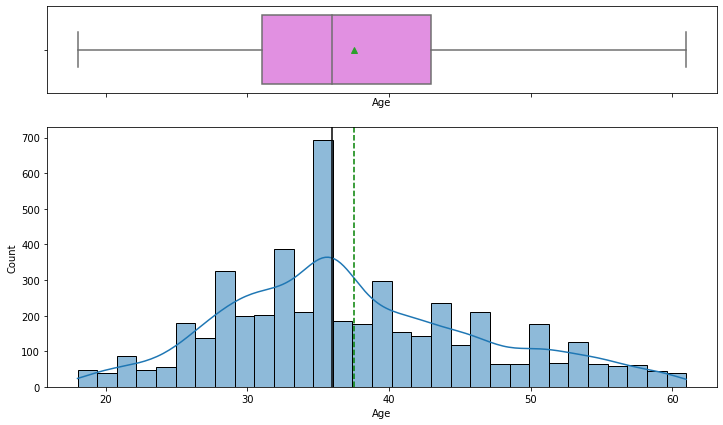

<IPython.core.display.Javascript object>

In [305]:
histogram_boxplot(tourist, "Age", figsize=(12, 7), kde=True, bins=None)

- The distribution of age looks very symmetric and almost like a normal distribution
- The youngest person in the dataset is 18 years old and oldest is 61
- The mean and median values of the age data are almost equal and data has slight right skew
- The age dataset looks good and ready for analysis

- #### Observations on DurationOfPitch

In [306]:
print("Missing values in DurationOfPitch :", tourist["DurationOfPitch"].isnull().sum())

Missing values in DurationOfPitch : 251


<IPython.core.display.Javascript object>

We will use median of DurationOfPitchdata to fill the missing values.

In [307]:
tourist["DurationOfPitch"] = tourist["DurationOfPitch"].fillna(
    tourist["DurationOfPitch"].median()
)

<IPython.core.display.Javascript object>

Now we can look at the visual represntation of the DurationOfPitch distribution.

count   4888.000
mean      15.363
std        8.316
min        5.000
25%        9.000
50%       13.000
75%       19.000
max      127.000
Name: DurationOfPitch, dtype: float64


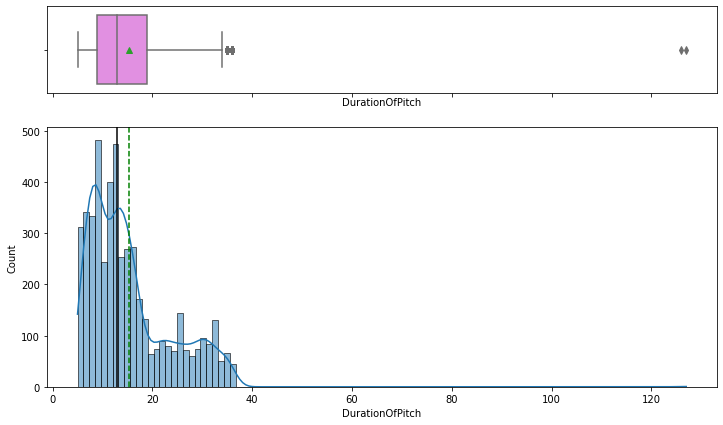

<IPython.core.display.Javascript object>

In [308]:
histogram_boxplot(tourist, "DurationOfPitch", figsize=(12, 7), kde=True, bins=None)

Clearly there are outliers in the DurationOfPitch data. We will cap those outliers at the right end of the boxplot whisker (Q3 +  1.5 x IQR)

In [309]:
Q3_DurationOfPitch = tourist["DurationOfPitch"].quantile(0.75)
Q1_DurationOfPitch = tourist["DurationOfPitch"].quantile(0.25)
IQR_DurationOfPitch = Q3_DurationOfPitch - Q1_DurationOfPitch
UpperCap_DurationOfPitch = Q3_DurationOfPitch + 1.5 * IQR_DurationOfPitch
tourist["DurationOfPitch"] = np.where(
    tourist["DurationOfPitch"] > UpperCap_DurationOfPitch,
    UpperCap_DurationOfPitch,
    tourist["DurationOfPitch"],
)

<IPython.core.display.Javascript object>

Reviewing the DurationOfPitch data after handling the outliers.

count   4888.000
mean      15.294
std        7.938
min        5.000
25%        9.000
50%       13.000
75%       19.000
max       34.000
Name: DurationOfPitch, dtype: float64


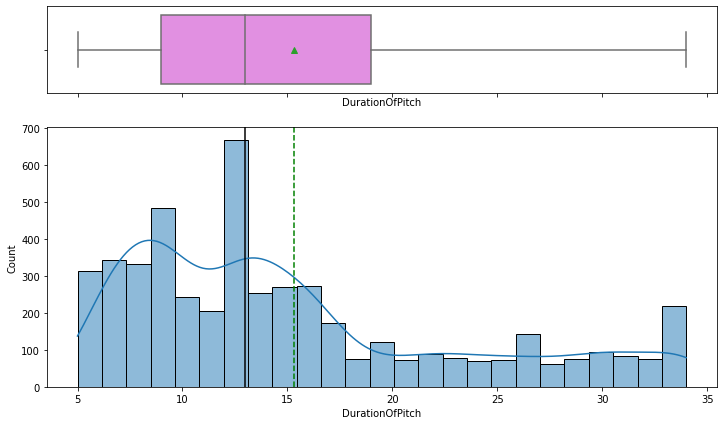

<IPython.core.display.Javascript object>

In [310]:
histogram_boxplot(tourist, "DurationOfPitch", figsize=(12, 7), kde=True, bins=None)

- The distribution of DurationOfPitch looks right skewed
- The shortest duration of pitch is 5 and the longest is 34 after caping the distribution at the right whisker of box plot.
- The duration of pitch dataset looks good and ready for analysis

- #### Observations on MonthlyIncome

In [311]:
print("Missing values in MonthlyIncome :", tourist["MonthlyIncome"].isnull().sum())

Missing values in MonthlyIncome : 233


<IPython.core.display.Javascript object>

We will use median of MonthlyIncome to fill the missing values.

In [312]:
tourist["MonthlyIncome"] = tourist["MonthlyIncome"].fillna(
    tourist["MonthlyIncome"].median()
)

<IPython.core.display.Javascript object>

Now we can look at the visual represntation of the MonthlyIncome distribution.

count    4888.000
mean    23559.179
std      5257.863
min      1000.000
25%     20485.000
50%     22347.000
75%     25424.750
max     98678.000
Name: MonthlyIncome, dtype: float64


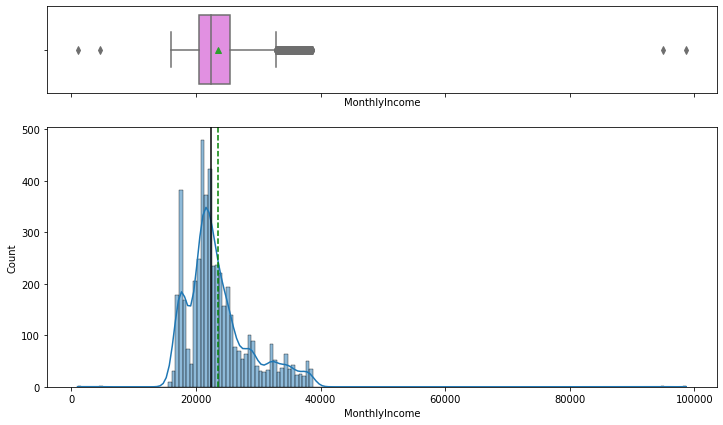

<IPython.core.display.Javascript object>

In [313]:
histogram_boxplot(tourist, "MonthlyIncome", figsize=(12, 7), kde=True, bins=None)

Clearly there are outliers in the MonthlyIncome data. We will cap the higher value outliers at the right end of the boxplot whisker (Q3 +  1.5 x IQR) and lower value outliers at the left end of the boxplot whisker (Q1 -  1.5 x IQR)

In [314]:
Q3_MonthlyIncome = tourist["MonthlyIncome"].quantile(0.75)
Q1_MonthlyIncome = tourist["MonthlyIncome"].quantile(0.25)
IQR_MonthlyIncome = Q3_MonthlyIncome - Q1_MonthlyIncome

UpperCap_MonthlyIncome = Q3_MonthlyIncome + 1.5 * IQR_MonthlyIncome
LowerCap_MonthlyIncome = Q1_MonthlyIncome - 1.5 * IQR_MonthlyIncome

tourist["MonthlyIncome"] = np.where(
    tourist["MonthlyIncome"] > UpperCap_MonthlyIncome,
    UpperCap_MonthlyIncome,
    tourist["MonthlyIncome"],
)

tourist["MonthlyIncome"] = np.where(
    tourist["MonthlyIncome"] < LowerCap_MonthlyIncome,
    LowerCap_MonthlyIncome,
    tourist["MonthlyIncome"],
)

<IPython.core.display.Javascript object>

Reviewing the DurationOfPitch data after handling the outliers.

count    4888.000
mean    23318.480
std      4513.943
min     13075.375
25%     20485.000
50%     22347.000
75%     25424.750
max     32834.375
Name: MonthlyIncome, dtype: float64


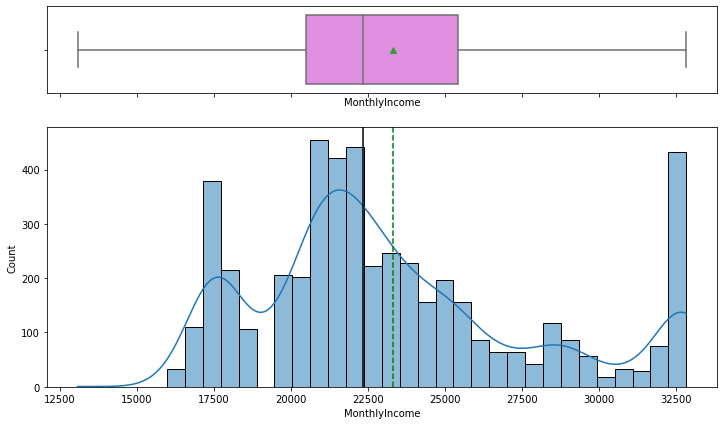

<IPython.core.display.Javascript object>

In [315]:
histogram_boxplot(tourist, "MonthlyIncome", figsize=(12, 7), kde=True, bins=None)

- The distribution of MonthlyIncome looks right skewed
- After handling the outliers, the Lowest monthly income is 13k and the highest is 32k 
- The MonthlyIncome dataset looks good and ready for analysis

- #### Observations on NumberOfTrips

In [316]:
print("Missing values in NumberOfTrips :", tourist["NumberOfTrips"].isnull().sum())

Missing values in NumberOfTrips : 140


<IPython.core.display.Javascript object>

We will use median of MonthlyIncome to fill the missing values.

In [317]:
tourist["NumberOfTrips"] = tourist["NumberOfTrips"].fillna(
    tourist["NumberOfTrips"].median()
)

<IPython.core.display.Javascript object>

Now we can look at the visual represntation of the MonthlyIncome distribution.

count   4888.000
mean       3.230
std        1.823
min        1.000
25%        2.000
50%        3.000
75%        4.000
max       22.000
Name: NumberOfTrips, dtype: float64


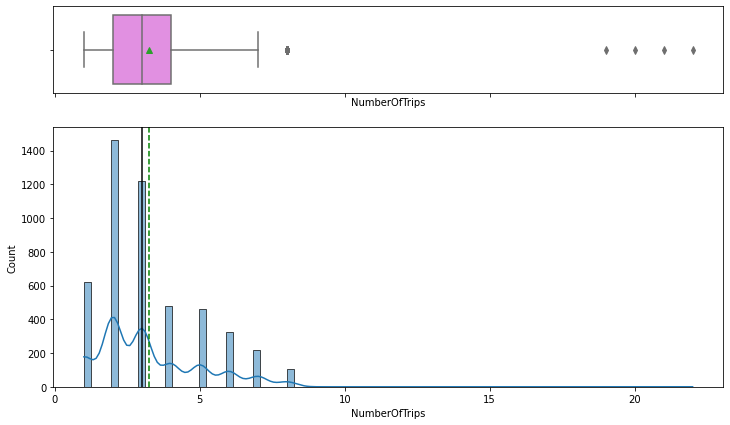

<IPython.core.display.Javascript object>

In [318]:
histogram_boxplot(tourist, "NumberOfTrips", figsize=(12, 7), kde=True, bins=None)

Clearly there are outliers in the NumberOfTrips data. We will cap the higher value outliers at the right end of the boxplot whisker (Q3 +  1.5 x IQR).

In [319]:
Q3_NumberOfTrips = tourist["NumberOfTrips"].quantile(0.75)
Q1_NumberOfTrips = tourist["NumberOfTrips"].quantile(0.25)
IQR_NumberOfTrips = Q3_NumberOfTrips - Q1_NumberOfTrips

UpperCap_NumberOfTrips = Q3_NumberOfTrips + 1.5 * IQR_NumberOfTrips
LowerCap_MonthlyIncome = Q1_MonthlyIncome - 1.5 * IQR_MonthlyIncome

tourist["NumberOfTrips"] = np.where(
    tourist["NumberOfTrips"] > UpperCap_NumberOfTrips,
    UpperCap_NumberOfTrips,
    tourist["NumberOfTrips"],
)

<IPython.core.display.Javascript object>

Reviewing the NumberOfTrips data after handling the outliers.

count   4888.000
mean       3.197
std        1.704
min        1.000
25%        2.000
50%        3.000
75%        4.000
max        7.000
Name: NumberOfTrips, dtype: float64


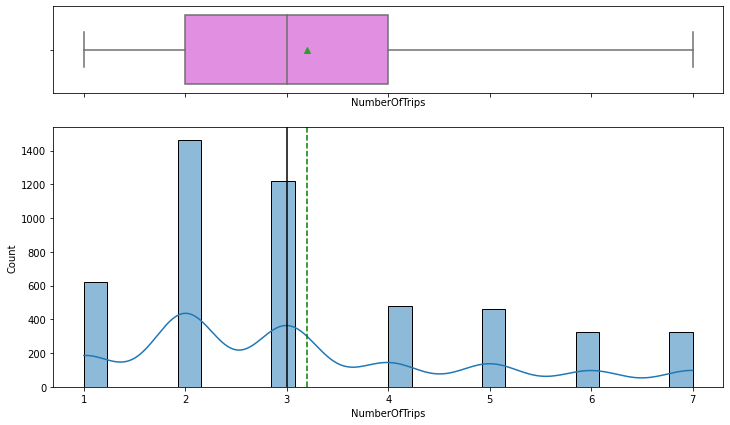

<IPython.core.display.Javascript object>

In [320]:
histogram_boxplot(tourist, "NumberOfTrips", figsize=(12, 7), kde=True, bins=None)

- The distribution of NumberOfTrips looks right skewed
- After handling the outliers, the Lowest number of trips is 1 and the highest is 7
- The NumberOfTrips dataset looks good and ready for analysis

- #### Filling missing values in TypeofContact, PreferredPropertyStar, NumberOfFollowups, NumberOfChildrenVisiting

In [321]:
catcol_missing_vals = [
    "TypeofContact",
    "PreferredPropertyStar",
    "NumberOfFollowups",
    "NumberOfChildrenVisiting",
]

for catcol_missing_val in catcol_missing_vals:
    tourist[catcol_missing_val] = tourist[catcol_missing_val].fillna(
        tourist[catcol_missing_val].mode().iloc[0]
    )

<IPython.core.display.Javascript object>

In [322]:
# Based on the information on datatypes for some columns, we can convert
# those columns to integers instead of floats
tourist[
    [
        "Age",
        "DurationOfPitch",
        "NumberOfFollowups",
        "PreferredPropertyStar",
        "NumberOfTrips",
        "NumberOfChildrenVisiting",
        "MonthlyIncome",
    ]
] = tourist[
    [
        "Age",
        "DurationOfPitch",
        "NumberOfFollowups",
        "PreferredPropertyStar",
        "NumberOfTrips",
        "NumberOfChildrenVisiting",
        "MonthlyIncome",
    ]
].astype(
    "int64"
)

<IPython.core.display.Javascript object>

- #### Observations on OwnCar

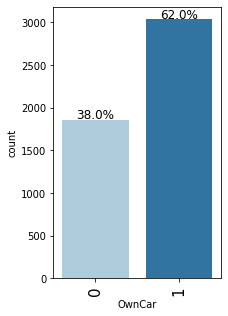

<IPython.core.display.Javascript object>

In [323]:
labeled_barplot(tourist, "OwnCar", perc=True)

- OwnCar is a binary variable
- Majority customers have cars

- #### Observations on Designation

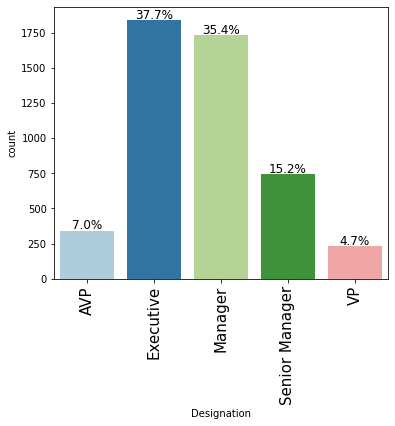

<IPython.core.display.Javascript object>

In [324]:
labeled_barplot(tourist, "Designation", perc=True)

- Designation is a categorical variable
- Majority customers have a designation of Executive

- #### Observations on NumberOfFollowups

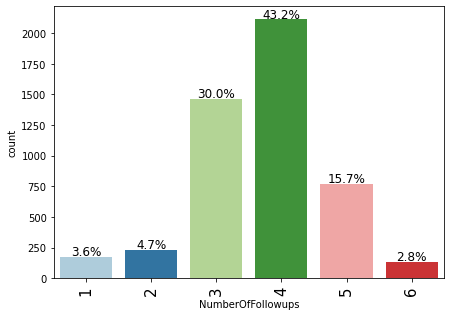

<IPython.core.display.Javascript object>

In [325]:
labeled_barplot(tourist, "NumberOfFollowups", perc=True)

- NumberOfFollowups is a categorical variable
- Majority customers have had 4 follow ups

- #### Observations on Passport

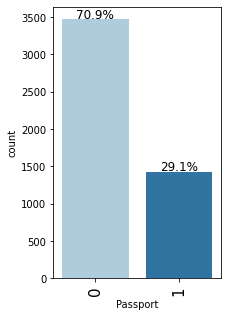

<IPython.core.display.Javascript object>

In [326]:
labeled_barplot(tourist, "Passport", perc=True)

- Passport is a binary categorical variable
- Majority customers do not have a passport

- #### Observations on Gender

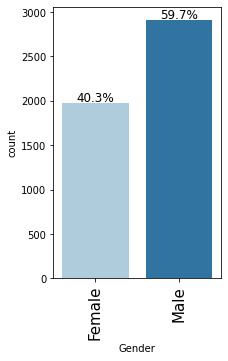

<IPython.core.display.Javascript object>

In [327]:
labeled_barplot(tourist, "Gender", perc=True)

- Gender is a binary categorical variable
- Majority customers are male

- #### Observations on Gender

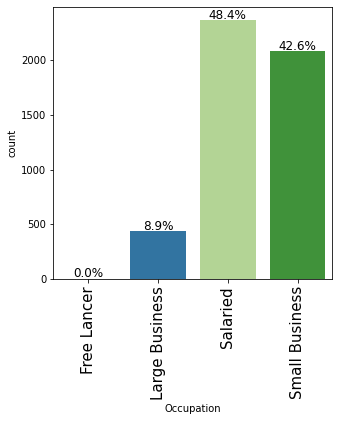

<IPython.core.display.Javascript object>

In [328]:
labeled_barplot(tourist, "Occupation", perc=True)

- Occupation is a categorical variable
- Majority customers are salaried

- #### Observations on NumberOfChildrenVisiting

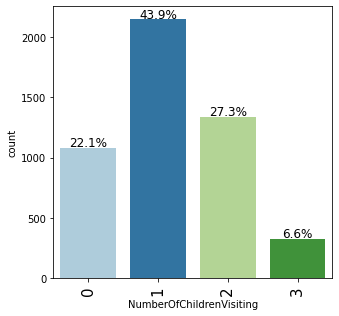

<IPython.core.display.Javascript object>

In [329]:
labeled_barplot(tourist, "NumberOfChildrenVisiting", perc=True)

- NumberOfChildrenVisiting is a categorical variable
- Majority customers have 1 child

- #### Observations on PreferredPropertyStar

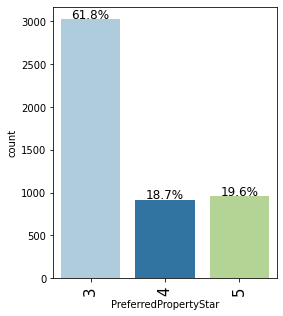

<IPython.core.display.Javascript object>

In [330]:
labeled_barplot(tourist, "PreferredPropertyStar", perc=True)

- PreferredPropertyStar is a categorical variable
- Majority customers have 3 preferred stars

- #### Observations on TypeofContact

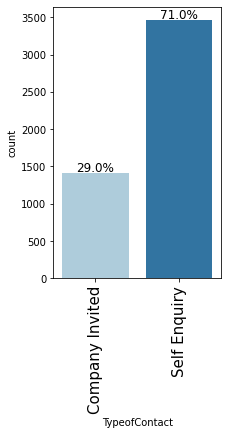

<IPython.core.display.Javascript object>

In [331]:
labeled_barplot(tourist, "TypeofContact", perc=True)

- TypeofContact is a categorical variable
- Majority customers self enquired about the travel packages

- #### Observations on PitchSatisfactionScore

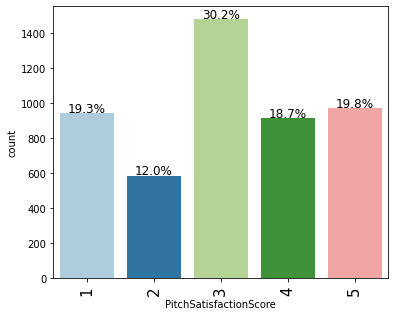

<IPython.core.display.Javascript object>

In [332]:
labeled_barplot(tourist, "PitchSatisfactionScore", perc=True)

- PitchSatisfactionScore is a categorical variable
- Majority customers have given a score of 3

- #### Observations on MaritalStatus

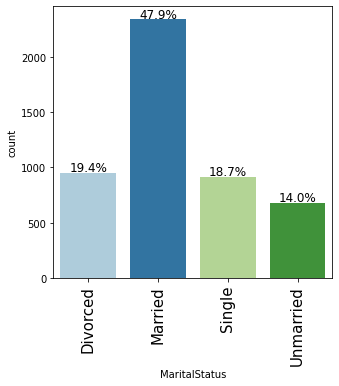

<IPython.core.display.Javascript object>

In [333]:
labeled_barplot(tourist, "MaritalStatus", perc=True)

- MaritalStatus is a categorical variable
- Nearly 50% of customers are married

- #### Observations on CityTier

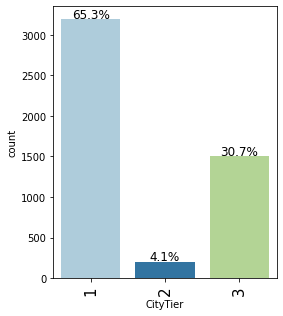

<IPython.core.display.Javascript object>

In [334]:
labeled_barplot(tourist, "CityTier", perc=True)

- CityTier is a categorical variable
- Dominant CityTier is 1

- #### Observations on ProductPitched

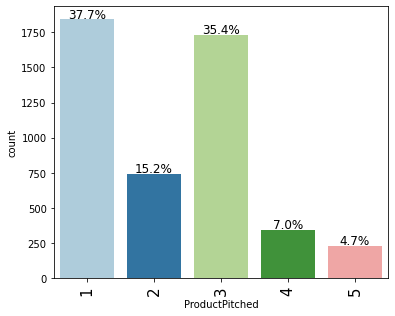

<IPython.core.display.Javascript object>

In [335]:
labeled_barplot(tourist, "ProductPitched", perc=True)

- ProductPitched is a categorical variable
- Dominant ProductPitched is Basic

- #### Observations on NumberOfPersonVisiting

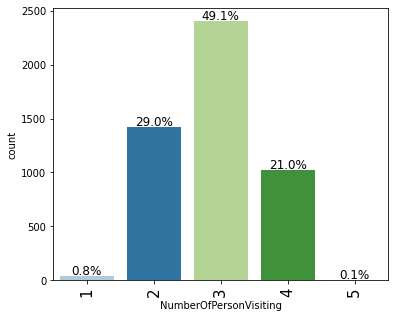

<IPython.core.display.Javascript object>

In [336]:
labeled_barplot(tourist, "NumberOfPersonVisiting", perc=True)

- NumberOfPersonVisiting is a categorical variable
- 3 is the most common group size for each package purchase

- #### Observations on ProdTaken

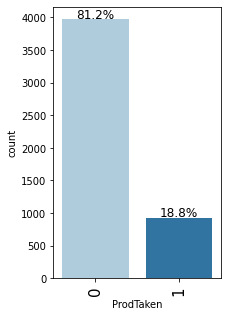

<IPython.core.display.Javascript object>

In [337]:
labeled_barplot(tourist, "ProdTaken", perc=True)

- ProdTaken is a categorical variable and also the target variable
- only 18.8% of the customers purchased the package

- ### Multi-Variate Analysis

In [338]:
# function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

- #### ProdTaken with MaritalStatus

ProdTaken                  0    1   All
NumberOfPersonVisiting                 
All                     3968  920  4888
3                       1942  460  2402
2                       1151  267  1418
4                        833  193  1026
1                         39    0    39
5                          3    0     3
------------------------------------------------------------------------------------------------------------------------


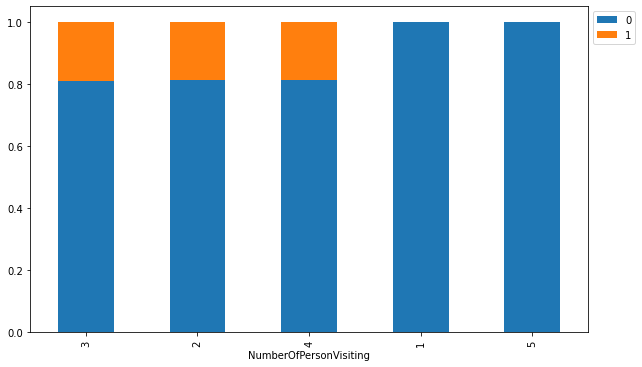

<IPython.core.display.Javascript object>

In [339]:
stacked_barplot(tourist, "NumberOfPersonVisiting", "ProdTaken")

- Group size of 2, 3 & 4 are the most common amongst customers who accepted the package

- #### ProdTaken with ProductPitched

ProdTaken          0    1   All
ProductPitched                 
All             3968  920  4888
1               1290  552  1842
3               1528  204  1732
2                618  124   742
4                322   20   342
5                210   20   230
------------------------------------------------------------------------------------------------------------------------


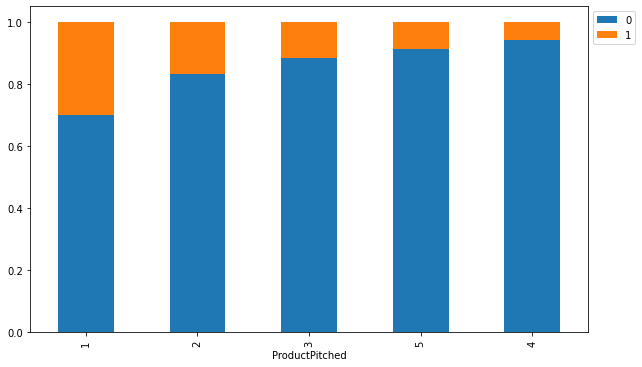

<IPython.core.display.Javascript object>

In [340]:
stacked_barplot(tourist, "ProductPitched", "ProdTaken")

- Product 1/Basic has the highest chance pf package acceptance
- Products 4 & 5 / Super Deluxe & King have the lowest chance of package acceptance

- #### ProdTaken with CityTier

ProdTaken     0    1   All
CityTier                  
All        3968  920  4888
1          2670  520  3190
3          1146  354  1500
2           152   46   198
------------------------------------------------------------------------------------------------------------------------


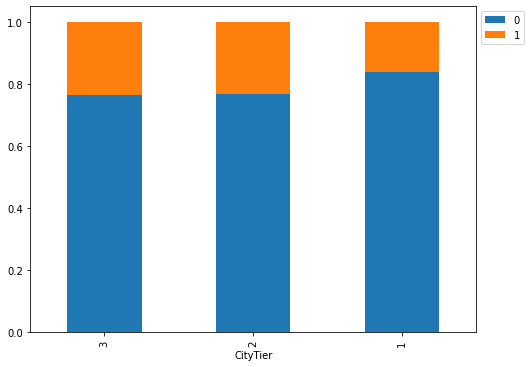

<IPython.core.display.Javascript object>

In [341]:
stacked_barplot(tourist, "CityTier", "ProdTaken")

- CityTier 1 has a lower chance pf package acceptance
- CityTier 2 & 3 have the highest chance of package acceptance. 
- CityTier 2 & 3 are under explored customer bases where the company can target more of its campaign

- #### ProdTaken with MaritalStatus

ProdTaken         0    1   All
MaritalStatus                 
All            3968  920  4888
Married        2014  326  2340
Single          612  304   916
Unmarried       516  166   682
Divorced        826  124   950
------------------------------------------------------------------------------------------------------------------------


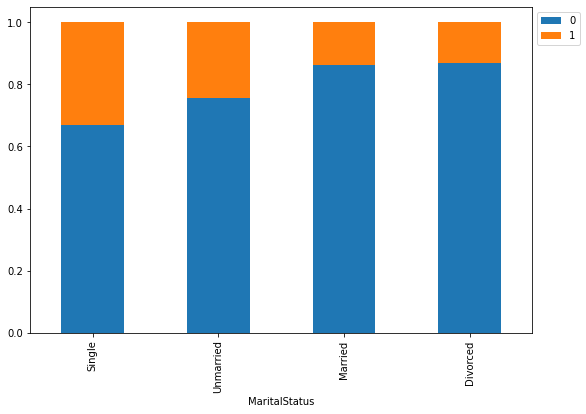

<IPython.core.display.Javascript object>

In [342]:
stacked_barplot(tourist, "MaritalStatus", "ProdTaken")

- MaritalStatus of Divorced has a lower chance pf package acceptance
- MaritalStatus of Single has the highest chance of package acceptance. 
- Single and Unmarried customers are under explored customer bases where the company can target more of its campaign

- #### ProdTaken with PreferredPropertyStar

ProdTaken                 0    1   All
PreferredPropertyStar                 
All                    3968  920  4888
3                      2531  488  3019
5                       706  250   956
4                       731  182   913
------------------------------------------------------------------------------------------------------------------------


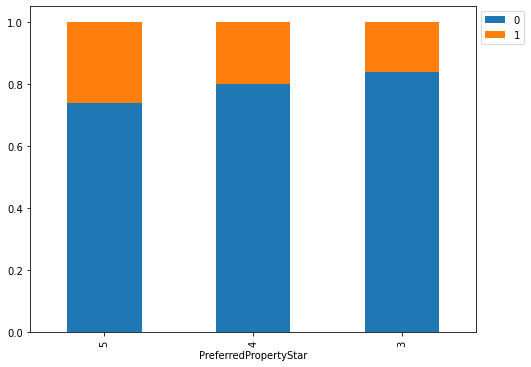

<IPython.core.display.Javascript object>

In [343]:
stacked_barplot(tourist, "PreferredPropertyStar", "ProdTaken")

- PreferredPropertyStar of 5 has a higher chance pf package acceptance

- #### ProdTaken with Occupation

ProdTaken          0    1   All
Occupation                     
All             3968  920  4888
Salaried        1954  414  2368
Small Business  1700  384  2084
Large Business   314  120   434
Free Lancer        0    2     2
------------------------------------------------------------------------------------------------------------------------


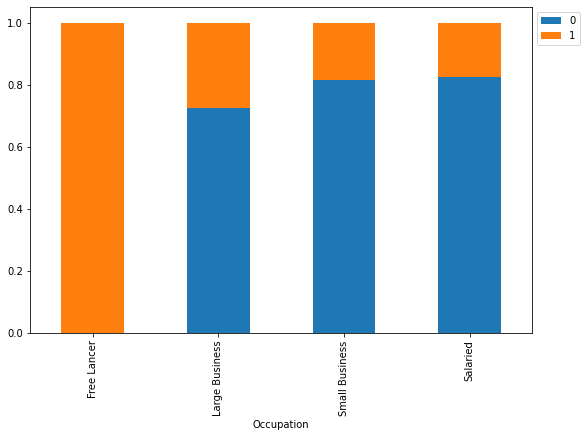

<IPython.core.display.Javascript object>

In [344]:
stacked_barplot(tourist, "Occupation", "ProdTaken")

- Salaried customers are less likley to but the travel package, yet they are the ones which are aproached the most of product picthing
- Maybe approaching customers who have occupation of Large/Small business or Freelance can results in better turn around response of product pitch

- #### ProdTaken with Passport

ProdTaken     0    1   All
Passport                  
All        3968  920  4888
1           928  494  1422
0          3040  426  3466
------------------------------------------------------------------------------------------------------------------------


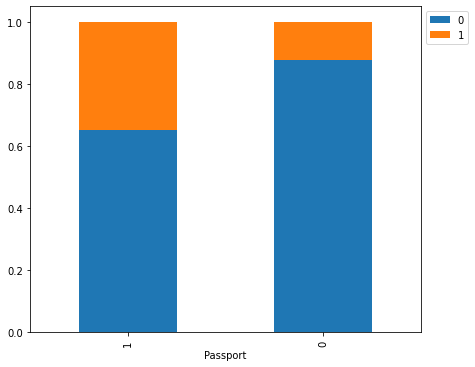

<IPython.core.display.Javascript object>

In [345]:
stacked_barplot(tourist, "Passport", "ProdTaken")

- Highest percentage of ProdTaken happens when the customers have passport

- #### ProdTaken with NumberOfFollowups

ProdTaken             0    1   All
NumberOfFollowups                 
All                3968  920  4888
4                  1726  387  2113
3                  1222  244  1466
5                   577  191   768
6                    82   54   136
2                   205   24   229
1                   156   20   176
------------------------------------------------------------------------------------------------------------------------


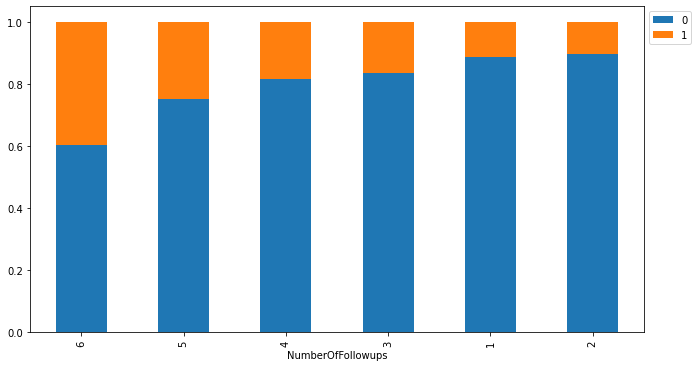

<IPython.core.display.Javascript object>

In [346]:
stacked_barplot(tourist, "NumberOfFollowups", "ProdTaken")

- Highest percentage of ProdTaken happens when the number of follow ups are higher.
- The lowest percentages of ProdTaken happens when number of follow ups are low.

- #### ProdTaken with Designation

ProdTaken          0    1   All
Designation                    
All             3968  920  4888
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
AVP              322   20   342
VP               210   20   230
------------------------------------------------------------------------------------------------------------------------


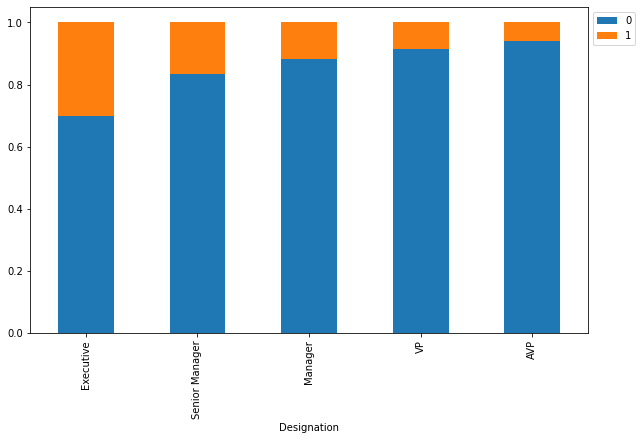

<IPython.core.display.Javascript object>

In [347]:
stacked_barplot(tourist, "Designation", "ProdTaken")

- Highest percentage of ProdTaken happens when the designation of customer is Executive.
- The lowest percentages of ProdTaken happens in the case of customers with designation of AVP.

- #### ProdTaken with Age

<AxesSubplot:xlabel='ProdTaken', ylabel='Age'>

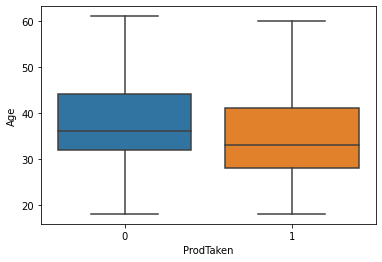

<IPython.core.display.Javascript object>

In [348]:
## Boxplot of ProdTaken with Age
sns.boxplot(data=tourist, x="ProdTaken", y="Age")

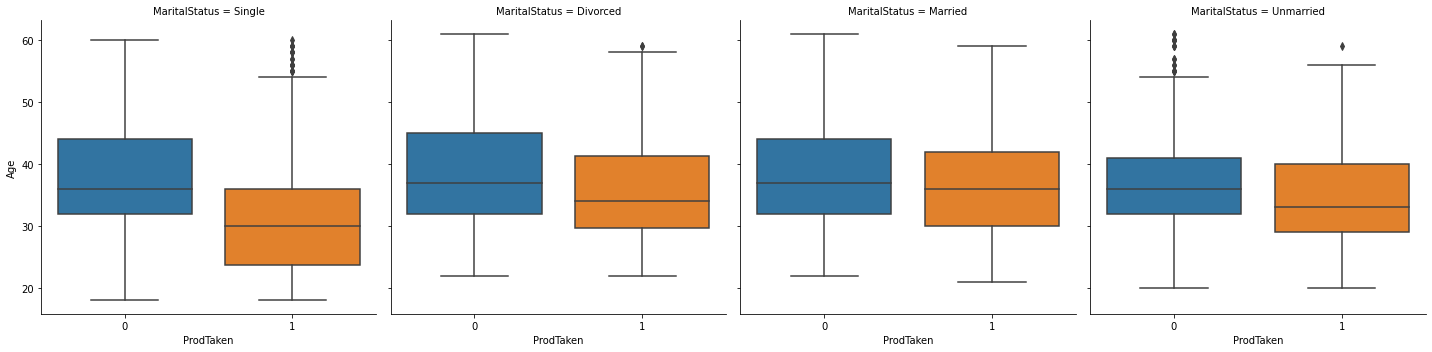

<IPython.core.display.Javascript object>

In [349]:
## Box plot of ProdTaken with Age along with hue of MaritalStatus
sns.catplot(y="Age", x="ProdTaken", kind="box", col="MaritalStatus", data=tourist)

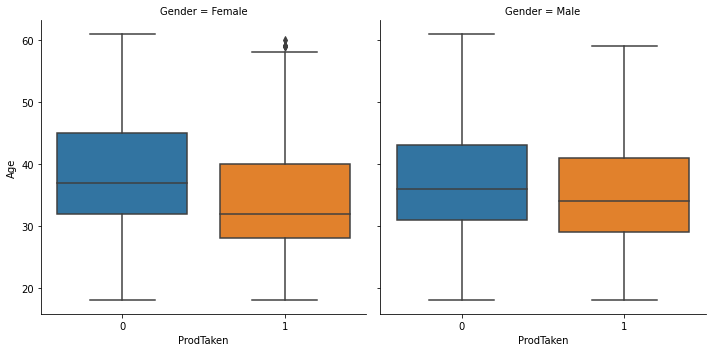

<IPython.core.display.Javascript object>

In [350]:
## Box plot of ProdTaken with Age along with hue of Gender
sns.catplot(y="Age", x="ProdTaken", kind="box", col="Gender", data=tourist)

- We can see that the age of the customers who accpeted the travel package is relatively lower than the customers who did not
- This trend is also witnessed across different marital status and genders
- This indicates that the demand of the travel package is higher in the younger customer base

- #### ProdTaken with MonthlyIncome

<AxesSubplot:xlabel='ProdTaken', ylabel='MonthlyIncome'>

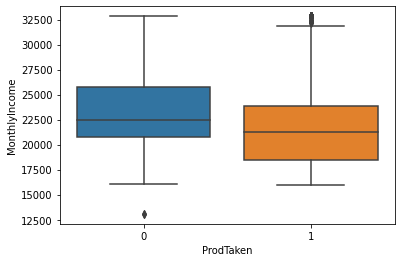

<IPython.core.display.Javascript object>

In [351]:
## Boxplot of ProdTaken with MonthlyIncome
sns.boxplot(data=tourist, x="ProdTaken", y="MonthlyIncome")

- The monthly income of customers who took the package is lower than the customers who did not take the package

- #### ProdTaken with NumberOfTrips

<AxesSubplot:xlabel='ProdTaken', ylabel='NumberOfTrips'>

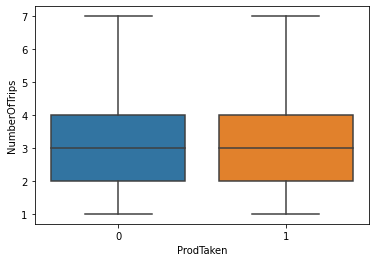

<IPython.core.display.Javascript object>

In [352]:
## Boxplot of ProdTaken with NumberOfTrips
sns.boxplot(data=tourist, x="ProdTaken", y="NumberOfTrips")

- There is no significant difference in the number of trips between the customers who took the travel package vs. those who did not.

- #### ProdTaken with DurationOfPitch

<AxesSubplot:xlabel='ProdTaken', ylabel='DurationOfPitch'>

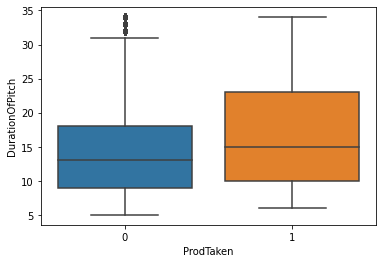

<IPython.core.display.Javascript object>

In [353]:
## Boxplot of ProdTaken with DurationOfPitch
sns.boxplot(data=tourist, x="ProdTaken", y="DurationOfPitch")

- Longer duration of pitch obviously increased the chances of customer taking the travel package

- #### Multivariate analysis of numerical variables

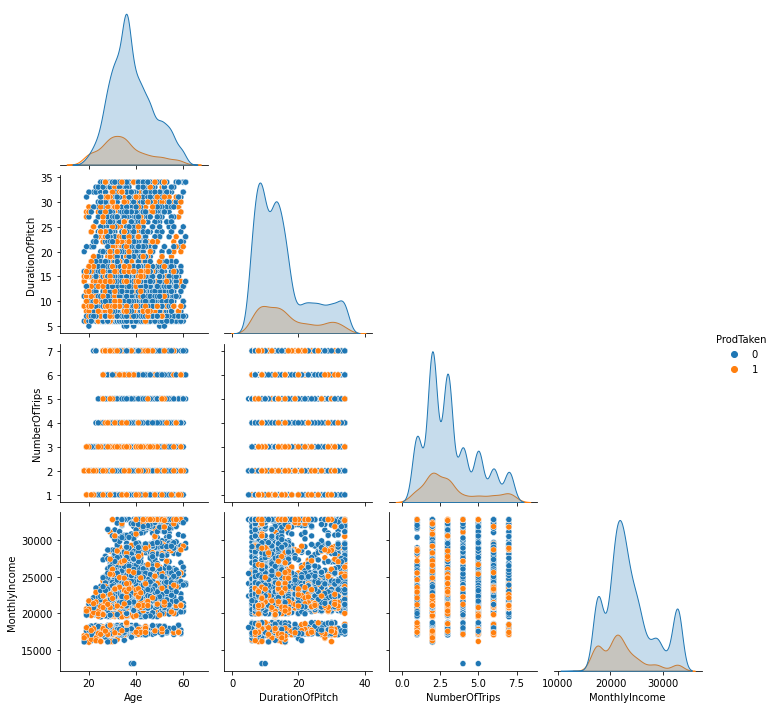

<IPython.core.display.Javascript object>

In [354]:
sns.pairplot(
    tourist[np.append(numcols, "ProdTaken")], hue="ProdTaken", corner=True,
)

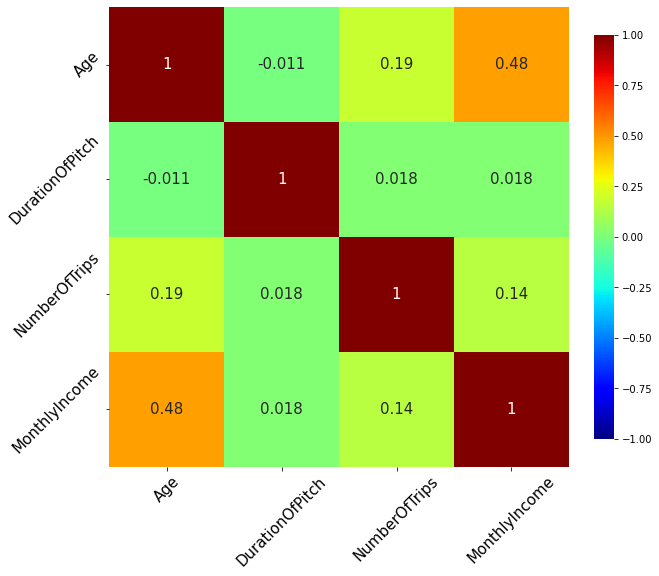

<IPython.core.display.Javascript object>

In [355]:
# Show the coorelation of numerical values on a color coded matrix

corr = tourist[numcols].corr()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
fig.tight_layout(pad=2.0)

sns.heatmap(
    corr,
    annot=True,
    ax=ax,
    annot_kws={"fontsize": 15},
    cmap="jet",
    vmin=-1,
    vmax=1,
    square=True,
    cbar_kws={"fraction": 0.04},
)
ax.tick_params(axis="both", rotation=45, labelsize=15)

- We do not see a significant correlation between the numerical variables in the dataset, except the MonthlyIncome and Age have a weak correlation.

### Summary of EDA

- #### Data description <br>

    - We have a dataset which describes the customer profile to whom travel package was pitched
    - There are 19 independent variable with a combination of categorical and numerical variables
    - The target variable is ProdTaken which tells if a customer accepted the travel package
    - The dataset has, 
        1. continuous variables
            - Age, DurationOfPitch, NumberOfTrips, MonthlyIncome
        2. discrete variables
            - OwnCar, Designation, NumberOfFollowups, Passport, Gender, Occupation, NumberOfChildrenVisiting,  PreferredPropertyStar, ProdTaken, TypeofContact, PitchSatisfactionScore, MaritalStatus, CityTier, ProductPitched, NumberOfPersonVisiting
    - The dataset has missing values in following columns
        - TypeofContact, PreferredPropertyStar, NumberOfFollowups, NumberOfChildrenVisiting, NumberOfTrips, Age, MonthlyIncome, DurationOfPitch

- #### Data Cleaning <br>
    
    - We have filled the missing values in the numerical columns with the median values and capped the outliers at the end of the whiskers of boxplot (Q1-1.5xIQR and Q3+1.5xIQR)
        - NumberOfTrips, Age, MonthlyIncome, DurationOfPitch
    - We have filled the missing values in the categorical columns with the mode
        - TypeofContact, PreferredPropertyStar, NumberOfFollowups, NumberOfChildrenVisiting
    - We have typo in the gender column where some values are recorded as 'Fe Male' instead of 'Female'. We replaced the incorrect values of 'Fe Male' with 'Female'
    
- #### Observations from EDA <br>

    - Age is almost normal distribution. 
        - The age of customers who took the package is relatively lower than customers who did not take the package
        - This trend is also seen across different gender and marital status
    - DurationOfPitch is a right skew data set with some extreme outliers on the right end
        - The longer the duration of pitch, more likely it is for the customer to accept the travel package
    - MonthylyIncome is a right skewed distribution.
        - This data had outliers on both ends and were capped at the whiskers of the box plot
    - NumberOfTrips is also a right skewed distribution. 
        - There are some customers who have taken very large number of trips and hence were outliers. They were capped at the right end of the boxplot whisker
        - The most common number of trips taken is 2
    - NumberOfPersonVisiting has significant impact on customer choosing the travel package
        - A medium sized group 2-4 is more likely to buy the travel package
        - Company's strategy to approach customers with medium group size is on spot in terms proper allocation of marketing resources. 
        - Company can further channel bit more resources towards group size 2 and 4
    - **Basic** package is the most commong ProductPitched, followed by **standard** package
        - More resources could be diverted towards the **standard** package as it shows significant returns on conversion from pitch to purchase
    - CityTier 2 and 3 have higher conversion from pitch to purchase
        - Currently more marketing is done in CityTier 1, which has a lower conversion. So more resources could be diverted to CityTier 2 and 3   
    - Single and Unmarried customers have higher tendency to buy the travel package
        - Nearly 50% of marketing is focused on married customers where the pitch to purchase conversion is low.
        - Focusing on unmarried and single customers can yield a better result on pitch to purchase conversion
    - PreferredPropertyStar of 4 & 5 have higher success from pitch to purchase
        - Nearly 60% of marketing is focused on PreferredPropertyStar of 3
        - Focusing on PreferredPropertyStar of 4 & 5 can yield a better result on pitch to purchase conversion
    - Occupation of Large and Small business have higher success from pitch to purchase
        - Nearly 50% of marketing is focused on Occupation = Salaried, which has a lower pitch to purchase conversion
        - Focusing on Occupation of large and small business can yield a better result on pitch to purchase conversion    
    - Customers having a passport gives a higher chance of purchasing the travel package
        - Nearly 70% of marketing is focused on customers who do not have a passport
        - Focusing on customers who have a passport can yield a better result on pitch to purchase conversion  
    - NumberOfFollowups in the range of 5-6 has a higher yield on pitch to purchase conversion
        - Nearly 75% of marketing ends at 3-4 follow ups
        - Maybe increasing the follow ups by 1 or two can further increase the package sales   
    - Executive desingated customers are most likely to buy the package 
        - Maybe focusing on customers designated as Senior Manager (15%) compared to customers designated as Managers (35%) can result in better sales

## 5. **Model Buliding**

### Model evaluation criterion

### Model can make wrong predictions as:
 
1. A customer to whom the the travel package is marketed will not be purchasing it but in reality the customer would buy it.

2. A customer to whom the the travel package is marketed will be taking purchasing the package but in reality the customer would not buy it. 

### Which case is more important? 

* If we predict a prospective customer as not interested in travel package, comapny will loose a potential customer.

### How to reduce this loss i.e need to reduce False Negatives?
*  `recall` should be maximized, the greater the recall higher the chances of minimizing the false negatives.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The get_metrics_score function will be used to check the model performance of models on test and training datasets
* The make_confusion_matrix function will be used to plot confusion matrix.

In [356]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model, flag=True):
    """
    model : classifier to predict values of X

    """
    # defining an empty list to store train and test results
    score_list = []

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_acc = model.score(X_train, Y_train)
    test_acc = model.score(X_test, Y_test)

    train_recall = metrics.recall_score(Y_train, pred_train)
    test_recall = metrics.recall_score(Y_test, pred_test)

    train_precision = metrics.precision_score(Y_train, pred_train)
    test_precision = metrics.precision_score(Y_test, pred_test)

    train_F1 = metrics.f1_score(Y_train, pred_train)
    test_F1 = metrics.f1_score(Y_test, pred_test)

    score_list.extend(
        (
            train_acc,
            test_acc,
            train_recall,
            test_recall,
            train_precision,
            test_precision,
            train_F1,
            test_F1,
        )
    )

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ", model.score(X_train, Y_train))
        print("Accuracy on test set : ", model.score(X_test, Y_test))
        print("Recall on training set : ", metrics.recall_score(Y_train, pred_train))
        print("Recall on test set : ", metrics.recall_score(Y_test, pred_test))
        print(
            "Precision on training set : ", metrics.precision_score(Y_train, pred_train)
        )
        print("Precision on test set : ", metrics.precision_score(Y_test, pred_test))
        print("F1 score on training set : ", metrics.f1_score(Y_train, pred_train))
        print("F1 score on test set : ", metrics.f1_score(Y_test, pred_test))

    return score_list  # returning the list with train and test scores

<IPython.core.display.Javascript object>

In [357]:
## Function to create confusion matrix
def make_confusion_matrix(model, X, y_actual, titletext, labels=[1, 0]):
    """
    model : classifier to predict values of X
    y_actual : ground truth  
    
    """
    y_predict = model.predict(X)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ["Predicted - No", "Predicted - Yes"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(7, 5))
    sns.heatmap(df_cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.title(titletext, fontsize=15)

<IPython.core.display.Javascript object>

- #### Copy the dataset, keep the useful columns and create dummies for categorical variables

In [358]:
# Make a copy of the dataset that we preppped for analysis
tourist_md = tourist.copy()

# Creating dummy variables
tourist_md = pd.get_dummies(tourist_md, columns=toBeDummiedCols, drop_first=False,)
tourist_md.sample(5)

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Gender_Female,Gender_Male,Occupation_Free Lancer,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP,TypeofContact_Company Invited,TypeofContact_Self Enquiry
154,0,32,3,14,2,3,2,3,2,0,4,1,1,23998,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0
2911,0,38,3,16,4,4,2,4,3,0,2,1,1,27512,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0
4491,0,38,1,17,3,4,1,5,2,1,3,1,1,21460,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1
638,0,25,3,13,2,4,3,5,2,0,3,1,1,22347,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1
3443,0,43,2,17,3,4,4,5,2,0,3,0,1,32834,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1


<IPython.core.display.Javascript object>

In [359]:
# A quick glimpse at the data after creating dummies
tourist_md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   ProdTaken                      4888 non-null   int64
 1   Age                            4888 non-null   int64
 2   CityTier                       4888 non-null   int64
 3   DurationOfPitch                4888 non-null   int64
 4   NumberOfPersonVisiting         4888 non-null   int64
 5   NumberOfFollowups              4888 non-null   int64
 6   ProductPitched                 4888 non-null   int64
 7   PreferredPropertyStar          4888 non-null   int64
 8   NumberOfTrips                  4888 non-null   int64
 9   Passport                       4888 non-null   int64
 10  PitchSatisfactionScore         4888 non-null   int64
 11  OwnCar                         4888 non-null   int64
 12  NumberOfChildrenVisiting       4888 non-null   int64
 13  MonthlyIncome     

<IPython.core.display.Javascript object>

- #### Split dataset into test and train data

In [360]:
# Split the dataset into independent variables and dependent variables
X = tourist_md.drop(["ProdTaken"], axis=1)
Y = tourist_md["ProdTaken"]

# Split the independent and dependent variables into test and training datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=3)

# Show the number of entries in test and train datasets
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

# Get the proportion of loan campaign accepted vs not accepted
print("\nPercentage of classes in training set:")
print(Y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(Y_test.value_counts(normalize=True))

# Get the proportion of loan campaign accepted vs not accepted in absolute numbers
print("\nNumbers of classes in training set:")
print(Y_train.value_counts(normalize=False))
print("Numbers of classes in test set:")
print(Y_test.value_counts(normalize=False))

Number of rows in train data = 3421
Number of rows in test data = 1467

Percentage of classes in training set:
0   0.815
1   0.185
Name: ProdTaken, dtype: float64
Percentage of classes in test set:
0   0.804
1   0.196
Name: ProdTaken, dtype: float64

Numbers of classes in training set:
0    2789
1     632
Name: ProdTaken, dtype: int64
Numbers of classes in test set:
0    1179
1     288
Name: ProdTaken, dtype: int64


<IPython.core.display.Javascript object>

- #### A quick glimpse at the column names

In [361]:
tourist_md.columns

Index(['ProdTaken', 'Age', 'CityTier', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'ProductPitched',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting',
       'MonthlyIncome', 'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'MaritalStatus_Unmarried', 'Gender_Female',
       'Gender_Male', 'Occupation_Free Lancer', 'Occupation_Large Business',
       'Occupation_Salaried', 'Occupation_Small Business', 'Designation_AVP',
       'Designation_Executive', 'Designation_Manager',
       'Designation_Senior Manager', 'Designation_VP',
       'TypeofContact_Company Invited', 'TypeofContact_Self Enquiry'],
      dtype='object')

<IPython.core.display.Javascript object>

- ### Decison Tree model

In [362]:
## Train the model
dt = DecisionTreeClassifier(random_state=1, class_weight="balanced")
dt.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

<IPython.core.display.Javascript object>

In [363]:
## Evaluate its performance on the training and test data
dt_perf = get_metrics_score(dt, True)

Accuracy on training set :  1.0
Accuracy on test set :  0.8623040218132243
Recall on training set :  1.0
Recall on test set :  0.625
Precision on training set :  1.0
Precision on test set :  0.656934306569343
F1 score on training set :  1.0
F1 score on test set :  0.6405693950177936


<IPython.core.display.Javascript object>

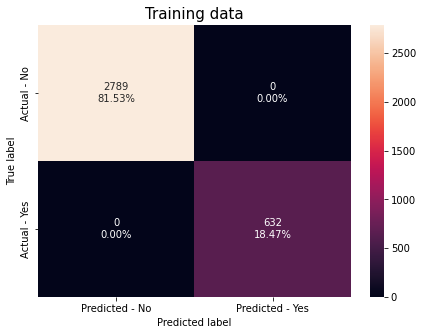

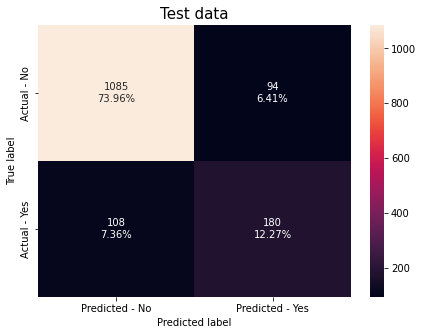

<IPython.core.display.Javascript object>

In [364]:
## Plot the confusion matrix for the training and test data
make_confusion_matrix(dt, X_train, Y_train, "Training data")
make_confusion_matrix(dt, X_test, Y_test, "Test data")

- The decision tree model is clearly overfitting as it has very clearly identified True Positive and True Negative on the training data but not so much on test data

- ### Random Forest model

In [365]:
## Train the model
rf = RandomForestClassifier(random_state=1, class_weight="balanced")
rf.fit(X_train, Y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

<IPython.core.display.Javascript object>

In [366]:
## Evaluate its performance on the training and test data
rf_perf = get_metrics_score(rf, True)

Accuracy on training set :  1.0
Accuracy on test set :  0.8834355828220859
Recall on training set :  1.0
Recall on test set :  0.4375
Precision on training set :  1.0
Precision on test set :  0.9333333333333333
F1 score on training set :  1.0
F1 score on test set :  0.5957446808510638


<IPython.core.display.Javascript object>

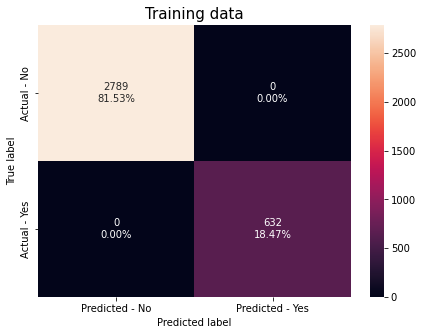

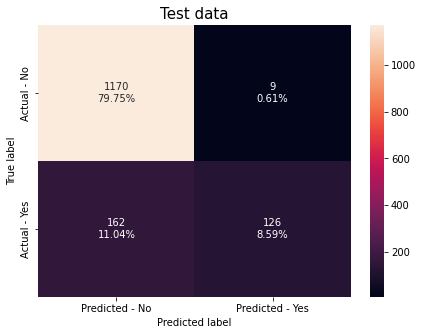

<IPython.core.display.Javascript object>

In [367]:
## Plot the confusion matrix for the training and test data
make_confusion_matrix(rf, X_train, Y_train, "Training data")
make_confusion_matrix(rf, X_test, Y_test, "Test data")

- The Random Forest model is clearly overfitting as it has very clearly identified True Positive and True Negative on the training data but not so much on test data
- It's performance is actually much worse than the Decision Tree in terms of recall, but slightly better on precision and accuracy

- ### Bagging Classifier

In [368]:
## Train the model
bc = BaggingClassifier(
    random_state=1,
    base_estimator=DecisionTreeClassifier(random_state=1, class_weight="balanced"),
)
bc.fit(X_train, Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                        random_state=1),
                  random_state=1)

<IPython.core.display.Javascript object>

In [369]:
## Evaluate its performance on the training and test data
bc_perf = get_metrics_score(bc, True)

Accuracy on training set :  0.9915229465068693
Accuracy on test set :  0.8936605316973415
Recall on training set :  0.9556962025316456
Recall on test set :  0.5104166666666666
Precision on training set :  0.9983471074380166
Precision on test set :  0.9074074074074074
F1 score on training set :  0.9765561843168957
F1 score on test set :  0.6533333333333333


<IPython.core.display.Javascript object>

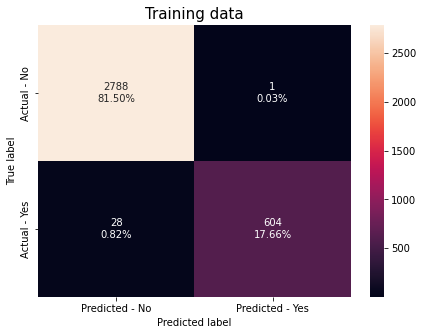

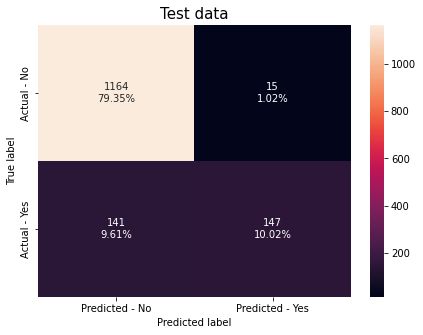

<IPython.core.display.Javascript object>

In [370]:
## Plot the confusion matrix for the training and test data
make_confusion_matrix(bc, X_train, Y_train, "Training data")
make_confusion_matrix(bc, X_test, Y_test, "Test data")

- The Bagging Classifier model is clearly overfitting, although not as bad as Random Forest or Decision Tree classifier
- It's performance is actually between the Random Forest and Decision Tree in terms of recall

- ### AdaBoost Classifier

In [371]:
## Train the model
abc = AdaBoostClassifier(
    random_state=1,
    base_estimator=DecisionTreeClassifier(random_state=1, class_weight="balanced"),
)
abc.fit(X_train, Y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         random_state=1),
                   random_state=1)

<IPython.core.display.Javascript object>

In [372]:
## Evaluate its performance on the training and test data
abc_perf = get_metrics_score(abc, True)

Accuracy on training set :  1.0
Accuracy on test set :  0.8677573278800272
Recall on training set :  1.0
Recall on test set :  0.6111111111111112
Precision on training set :  1.0
Precision on test set :  0.6821705426356589
F1 score on training set :  1.0
F1 score on test set :  0.6446886446886447


<IPython.core.display.Javascript object>

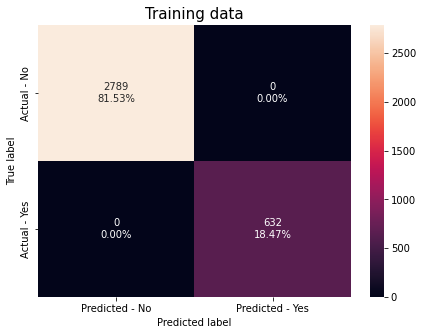

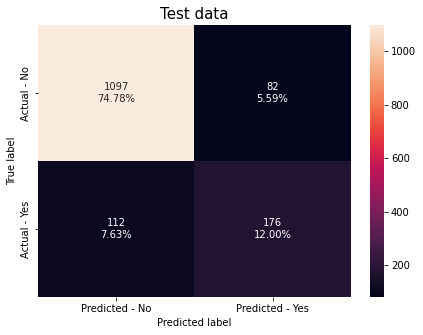

<IPython.core.display.Javascript object>

In [373]:
## Plot the confusion matrix for the training and test data
make_confusion_matrix(abc, X_train, Y_train, "Training data")
make_confusion_matrix(abc, X_test, Y_test, "Test data")

- The AdaBoost Classifier model is also clearly overfitting.
- It has performance similar to Decision Tree with recall of 0.61 on the test dataset

- ### Gradient Boosting Classifier

In [374]:
## Train the model
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train, Y_train)

GradientBoostingClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [375]:
## Evaluate its performance on the training and test data
gbc_perf = get_metrics_score(gbc, True)

Accuracy on training set :  0.8927214264834844
Accuracy on test set :  0.8548057259713702
Recall on training set :  0.4936708860759494
Recall on test set :  0.3368055555555556
Precision on training set :  0.8690807799442897
Precision on test set :  0.8151260504201681
F1 score on training set :  0.6296670030272452
F1 score on test set :  0.4766584766584767


<IPython.core.display.Javascript object>

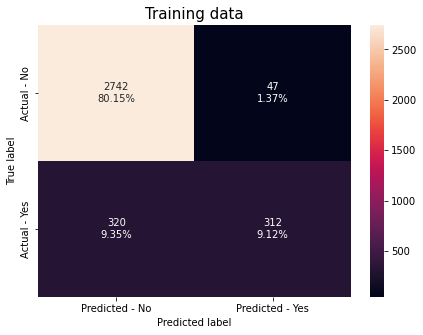

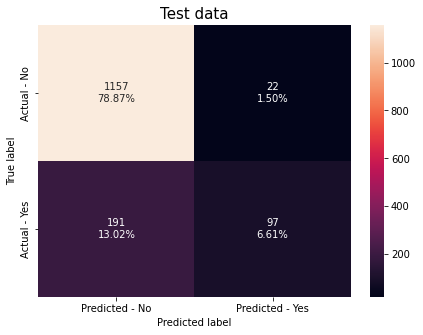

<IPython.core.display.Javascript object>

In [376]:
## Plot the confusion matrix for the training and test data
make_confusion_matrix(gbc, X_train, Y_train, "Training data")
make_confusion_matrix(gbc, X_test, Y_test, "Test data")

- The Gradient Boost classifier is not overfitting but is not doing a good job in identifying the false negatives
- The Gradient Boost Classifier is doing a good job in identifying the False Positives.

- ### XGBoost Classifier

In [377]:
## Train the model
xgb = XGBClassifier(random_state=1, eval_metric="logloss")
xgb.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [378]:
## Evaluate its performance on the training and test data
xgb_perf = get_metrics_score(xgb, True)

Accuracy on training set :  0.9997076878105817
Accuracy on test set :  0.9113837764144512
Recall on training set :  0.9984177215189873
Recall on test set :  0.6215277777777778
Precision on training set :  1.0
Precision on test set :  0.895
F1 score on training set :  0.9992082343626286
F1 score on test set :  0.7336065573770492


<IPython.core.display.Javascript object>

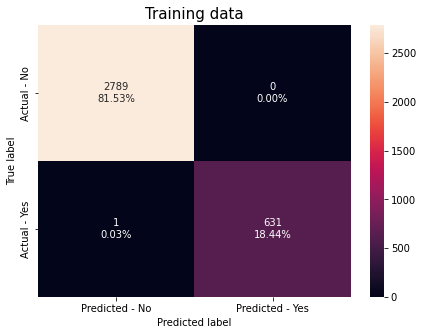

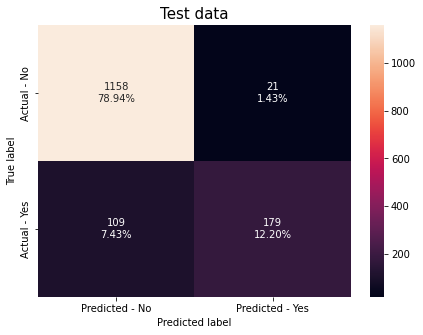

<IPython.core.display.Javascript object>

In [379]:
## Plot the confusion matrix for the training and test data
make_confusion_matrix(xgb, X_train, Y_train, "Training data")
make_confusion_matrix(xgb, X_test, Y_test, "Test data")

- The XGBoost Classifier model is clearly overfitting.
- The model is similar to Decision Tree and Bagging classifier in reducing false negatives but is also good in identifying flase positives

### Using GridSearch for Hyperparameter tuning

- #### Decision Tree tuning

In [188]:
#  Choose the type of classifier.
dt_tuned = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 10, 15, 20, 25, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [1e-6, 1e-5, 1e-4, 1e-3, 1e-2],
    "min_samples_leaf": [2, 3, 5],
    "max_leaf_nodes": [5, 7, 10, 15],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(
    dt_tuned, parameters, scoring=scorer, cv=5, n_jobs=-1, verbose=1
)
grid_obj = grid_obj.fit(X_train, Y_train)

# Set the clf to the best combination of parameters
dt_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dt_tuned.fit(X_train, Y_train)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=1e-06, min_samples_leaf=2,
                       random_state=1, splitter='random')

<IPython.core.display.Javascript object>

In [189]:
#### Evaluate its performance on the training and test data
dt_tuned_perf = get_metrics_score(dt_tuned, True)

Accuracy on training set :  0.6942414498684595
Accuracy on test set :  0.6884798909338786
Recall on training set :  0.810126582278481
Recall on test set :  0.7638888888888888
Precision on training set :  0.3560500695410292
Precision on test set :  0.361247947454844
F1 score on training set :  0.4946859903381642
F1 score on test set :  0.49052396878483834


<IPython.core.display.Javascript object>

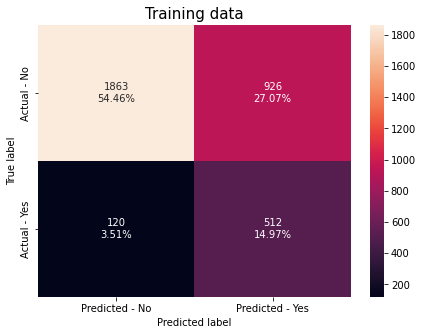

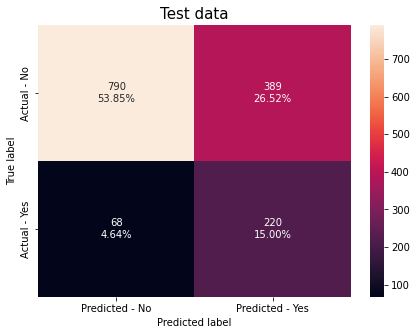

<IPython.core.display.Javascript object>

In [190]:
## Plot the confusion matrix for the training and test data
make_confusion_matrix(dt_tuned, X_train, Y_train, "Training data")
make_confusion_matrix(dt_tuned, X_test, Y_test, "Test data")

- The tuned decision tree model has reduced the overfitting significantly
- The recall performace has gone up for test dataset and gone down for training datset

- #### Random Forest tuning

In [191]:
#  Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100, 150, 200, 250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": ['auto'],
    "max_samples": np.arange(0.3, 0.7, 0.1),
    "max_depth":[5,9,15],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5, verbose=1, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, Y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, Y_train)


Fitting 5 folds for each of 240 candidates, totalling 1200 fits


RandomForestClassifier(class_weight='balanced', max_depth=5,
                       max_samples=0.6000000000000001, min_samples_leaf=8,
                       n_estimators=150, random_state=1)

<IPython.core.display.Javascript object>

In [192]:
#### Evaluate its performance on the training and test data
rf_tuned_perf = get_metrics_score(rf_tuned, True)

Accuracy on training set :  0.8310435545162234
Accuracy on test set :  0.8159509202453987
Recall on training set :  0.7199367088607594
Recall on test set :  0.6041666666666666
Precision on training set :  0.5315420560747663
Precision on test set :  0.5272727272727272
F1 score on training set :  0.6115591397849462
F1 score on test set :  0.5631067961165047


<IPython.core.display.Javascript object>

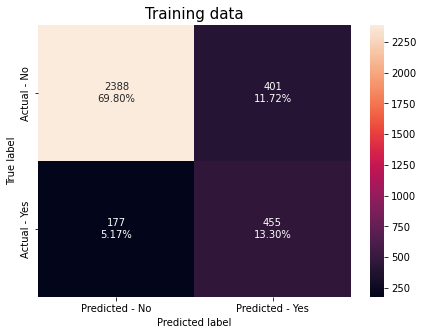

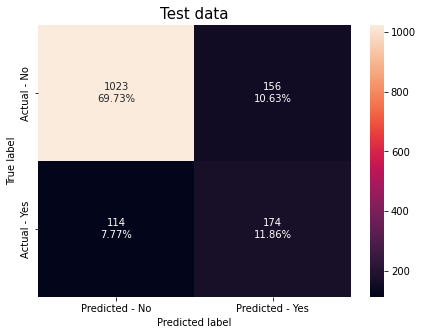

<IPython.core.display.Javascript object>

In [193]:
## Plot the confusion matrix for the training and test data
make_confusion_matrix(rf_tuned, X_train, Y_train, "Training data")
make_confusion_matrix(rf_tuned, X_test, Y_test, "Test data")

- The tuned Random Forest model has reduced the overfitting
- The recall performace has gone up slightly for test data and reduced for training data. 
- The performance in terms of recall on test dataset, tuned decision tree is still the best

- #### Bagging Classifier tuning

In [380]:
#  Choose the type of classifier.
bc_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
    "n_estimators": [10, 20, 30, 40, 50],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(
    bc_tuned, parameters, scoring=scorer, cv=5, verbose=1, n_jobs=-1
)
grid_obj = grid_obj.fit(X_train, Y_train)

# Set the clf to the best combination of parameters
bc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bc_tuned.fit(X_train, Y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=30,
                  random_state=1)

<IPython.core.display.Javascript object>

In [381]:
#### Evaluate its performance on the training and test data
bc_tuned_perf = get_metrics_score(bc_tuned, True)

Accuracy on training set :  0.9976615024846536
Accuracy on test set :  0.8977505112474438
Recall on training set :  0.9889240506329114
Recall on test set :  0.5277777777777778
Precision on training set :  0.9984025559105432
Precision on test set :  0.9156626506024096
F1 score on training set :  0.9936406995230526
F1 score on test set :  0.6696035242290749


<IPython.core.display.Javascript object>

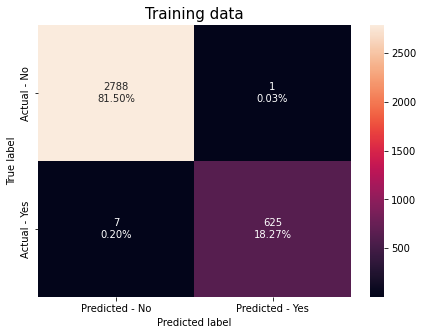

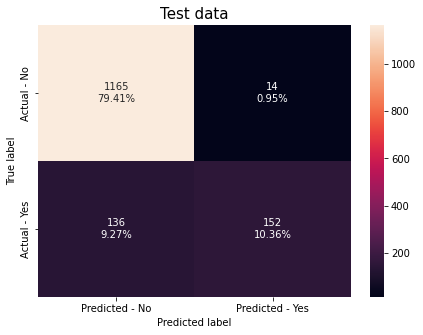

<IPython.core.display.Javascript object>

In [196]:
## Plot the confusion matrix for the training and test data
make_confusion_matrix(bc_tuned, X_train, Y_train, "Training data")
make_confusion_matrix(bc_tuned, X_test, Y_test, "Test data")

- The tuned Bagging Classifier has reduced the overfitting by very little amount
- Tuning does not help the Bagging classifier

- #### AdaBoost Classifier tuning

In [202]:
#  Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1),
        DecisionTreeClassifier(max_depth=2),
        #         DecisionTreeClassifier(max_depth=3),
    ],
    "n_estimators": np.arange(100, 210, 10),
    "learning_rate": np.arange(0.1, 1.8, 0.1),
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(
    abc_tuned, parameters, scoring=scorer, cv=5, verbose=1, n_jobs=-1
)
grid_obj = grid_obj.fit(X_train, Y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, Y_train)

Fitting 5 folds for each of 374 candidates, totalling 1870 fits


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=1.6, n_estimators=190, random_state=1)

<IPython.core.display.Javascript object>

In [203]:
#### Evaluate its performance on the training and test data
abc_tuned_perf = get_metrics_score(abc_tuned, True)

Accuracy on training set :  0.957907044723765
Accuracy on test set :  0.852760736196319
Recall on training set :  0.8401898734177216
Recall on test set :  0.4965277777777778
Precision on training set :  0.9250871080139372
Precision on test set :  0.6682242990654206
F1 score on training set :  0.8805970149253731
F1 score on test set :  0.5697211155378485


<IPython.core.display.Javascript object>

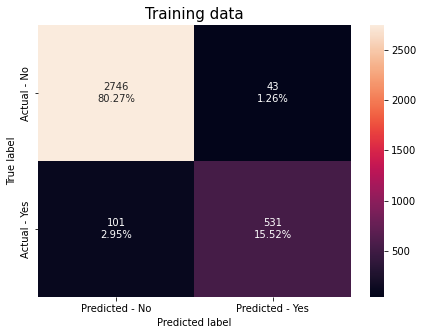

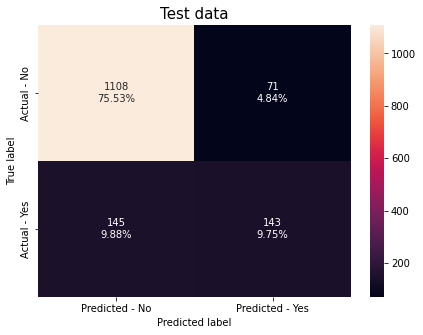

<IPython.core.display.Javascript object>

In [204]:
## Plot the confusion matrix for the training and test data
make_confusion_matrix(abc_tuned, X_train, Y_train, "Training data")
make_confusion_matrix(abc_tuned, X_test, Y_test, "Test data")

- The tuned Adaboost classifier is actually performing worse than the classifier with default parameters

- #### Gradient Boosting Classifier tuning

In [210]:
#  Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100, 150, 200, 250],
    "subsample": [0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(
    gbc_tuned, parameters, scoring=scorer, cv=5, verbose=1, n_jobs=-1
)
grid_obj = grid_obj.fit(X_train, Y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, Y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=250, random_state=1,
                           subsample=0.9)

<IPython.core.display.Javascript object>

In [211]:
#### Evaluate its performance on the training and test data
gbc_tuned_perf = get_metrics_score(gbc_tuned, True)

Accuracy on training set :  0.9321835720549547
Accuracy on test set :  0.8650306748466258
Recall on training set :  0.6693037974683544
Recall on test set :  0.4444444444444444
Precision on training set :  0.9484304932735426
Precision on test set :  0.7710843373493976
F1 score on training set :  0.7847866419294991
F1 score on test set :  0.5638766519823788


<IPython.core.display.Javascript object>

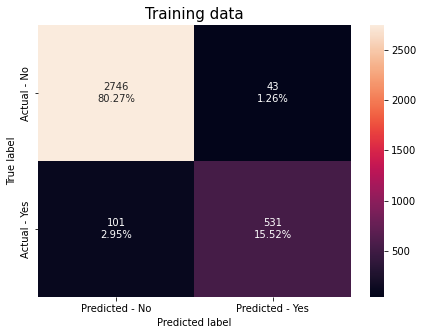

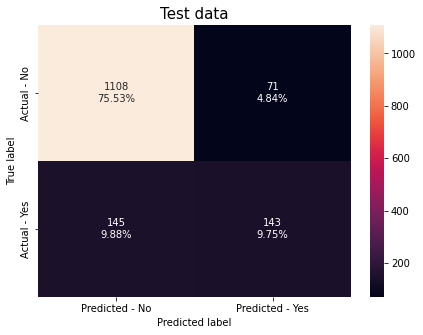

<IPython.core.display.Javascript object>

In [212]:
## Plot the confusion matrix for the training and test data
make_confusion_matrix(abc_tuned, X_train, Y_train, "Training data")
make_confusion_matrix(abc_tuned, X_test, Y_test, "Test data")

- The tuned Gradient Boosting classifier has performance is slightly better than the model with default parameters.
- The tuned Gradient Boosting classifier is still below some of the other models so far

- #### XGBoost Classifier tuning

In [214]:
#  Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(10, 100, 20),
    "scale_pos_weight": [0, 5],
    "colsample_bylevel": [0.5, 1],
    "learning_rate": [0.001, 0.01, 0.1, 0.5],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(
    xgb_tuned, parameters, scoring=scorer, cv=5, verbose=1, n_jobs=-1
)
grid_obj = grid_obj.fit(X_train, Y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, Y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index 

/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_l

/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_l

/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_l

/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_l

/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_l

/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_l

/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_l

/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_l

/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_l

/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_l

/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_l

/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_l

/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_l

/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_l

/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_l

/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_l

/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_l

/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_l

/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_l

/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_l

/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_l

/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_l

/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_l

/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_l

/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_l

/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_l

/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_l

/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_l

/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_l

/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_l

/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_l

/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_l

/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_l

/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_l

/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_l

/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_l

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=90, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=5, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [382]:
#### Evaluate its performance on the training and test data
xgb_tuned_perf = get_metrics_score(xgb_tuned, True)

Accuracy on training set :  0.9807073954983923
Accuracy on test set :  0.8888888888888888
Recall on training set :  0.995253164556962
Recall on test set :  0.7361111111111112
Precision on training set :  0.9089595375722543
Precision on test set :  0.7090301003344481
F1 score on training set :  0.9501510574018127
F1 score on test set :  0.7223168654173764


<IPython.core.display.Javascript object>

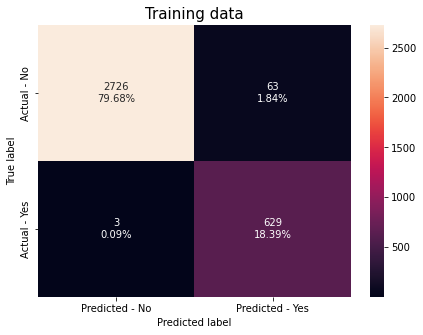

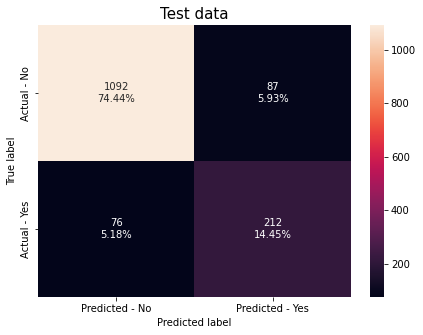

<IPython.core.display.Javascript object>

In [383]:
## Plot the confusion matrix for the training and test data
make_confusion_matrix(xgb_tuned, X_train, Y_train, "Training data")
make_confusion_matrix(xgb_tuned, X_test, Y_test, "Test data")

- The tuned XGBoost model is still overfitting but improved the recall on the test dataset

- ### Stacking Classifier

In [252]:
estimators = [
    ("Decision Tree", dt),
    ("Random Forest", rf),
    ("Bagging Classifier", bc),
    ("AdaBoost", abc),
    ("Gradient Boosting", gbc),
]
final_estimator = XGBClassifier(random_state=1, eval_metric="logloss")

sc = StackingClassifier(
    estimators=estimators, final_estimator=final_estimator, cv=5, n_jobs=-1
)
sc.fit(X_train, Y_train)

StackingClassifier(cv=5,
                   estimators=[('Decision Tree',
                                DecisionTreeClassifier(class_weight='balanced',
                                                       random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(class_weight='balanced',
                                                       random_state=1)),
                               ('Bagging Classifier',
                                BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                                        random_state=1),
                                                  random_state=1)),
                               ('AdaBoost',
                                AdaBoost...
                                                 interaction_constraints=None,
                                                 learning_rate=N

<IPython.core.display.Javascript object>

In [253]:
#### Evaluate its performance on the training and test data
sc_perf = get_metrics_score(sc, True)

Accuracy on training set :  0.9994153756211634
Accuracy on test set :  0.9134287661895024
Recall on training set :  1.0
Recall on test set :  0.6944444444444444
Precision on training set :  0.9968454258675079
Precision on test set :  0.8368200836820083
F1 score on training set :  0.9984202211690364
F1 score on test set :  0.7590132827324478


<IPython.core.display.Javascript object>

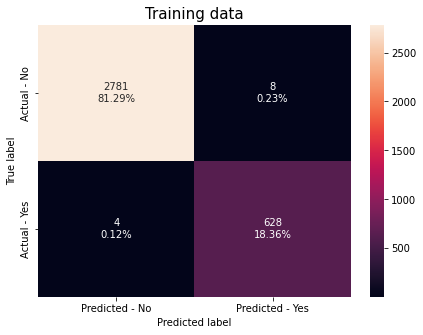

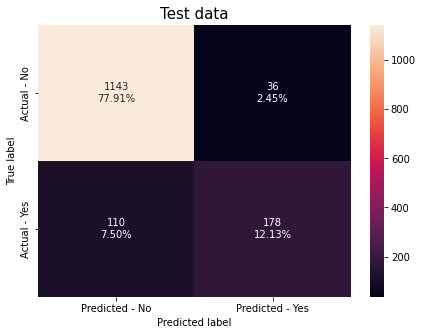

<IPython.core.display.Javascript object>

In [223]:
## Plot the confusion matrix for the training and test data
make_confusion_matrix(sc, X_train, Y_train, "Training data")
make_confusion_matrix(sc, X_test, Y_test, "Test data")

- Stacking model is constructed using the tuned decision tree, random forest, bagging, adaboost and gradient boosting classifiers.
- It does overfit and performs worse than some of the invidual estimators

- ### Model comparisons: Decision Tree, Random Forest and Bagging Classifier

In [259]:
# defining list of model performance infomration
models_perf = [dt_perf, rf_perf, bc_perf, dt_tuned_perf, rf_tuned_perf, bc_tuned_perf]

# defining list of model names
models_name = [
    "Decision Tree with default parameters",
    "Random Forest with default parameters",
    "Bagging Classifier with default parameters",
    "Decision Tree tuned",
    "Random Forest tuned",
    "Bagging Classifier tuned",
]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

# looping through all the models to get the accuracy, precall, precision and F1 scores
for model in models_perf:
    acc_train.append(np.round(model[0], 2))
    acc_test.append(np.round(model[1], 2))
    recall_train.append(np.round(model[2], 2))
    recall_test.append(np.round(model[3], 2))
    precision_train.append(np.round(model[4], 2))
    precision_test.append(np.round(model[5], 2))
    f1_train.append(np.round(model[6], 2))
    f1_test.append(np.round(model[7], 2))

# Compile all the metrics and models in a dataframe
compiled_dt_rf_bc_perf = pd.DataFrame(
    {
        "Model Name": models_name,
        "Training Accuracy": acc_train,
        "Test Accuracy": acc_test,
        "Training Recall": recall_train,
        "Test Recall": recall_test,
        "Training precision": precision_train,
        "Test precision": precision_test,
        "Training F1 score": f1_train,
        "Test F1 score": f1_test,
    }
)
compiled_dt_rf_bc_perf.sort_values(by="Test Recall", ascending=False).reset_index(
    drop=True
)

,Model Name,Training Accuracy,Test Accuracy,Training Recall,Test Recall,Training precision,Test precision,Training F1 score,Test F1 score
0,Decision Tree tuned,0.690,0.690,0.810,0.760,0.360,0.360,0.490,0.490
1,Decision Tree with default parameters,1.000,0.860,1.000,0.620,1.000,0.660,1.000,0.640
2,Random Forest tuned,0.830,0.820,0.720,0.600,0.530,0.530,0.610,0.560
3,Bagging Classifier tuned,1.000,0.900,0.990,0.530,1.000,0.920,0.990,0.670
4,Bagging Classifier with default parameters,0.990,0.890,0.960,0.510,1.000,0.910,0.980,0.650
5,Random Forest with default parameters,1.000,0.880,1.000,0.440,1.000,0.930,1.000,0.600


<IPython.core.display.Javascript object>

- Amongst all the listed models above which do not use boosting, a tuned decision tree performs the best
    - A tuned decision tree has least amount of overfitting as well
- Random forest has the poorest performance in terms of recall
    - In terms of precision it has a relatively good performance

- ### Model comparisons: AdaBoost, Gradient Boosting, XGBoost and Stacking classifiers

In [260]:
# defining list of model performance infomration
models_perf = [
    abc_perf,
    gbc_perf,
    xgb_perf,
    abc_tuned_perf,
    gbc_tuned_perf,
    xgb_tuned_perf,
    sc_perf,
]

# defining list of model names
models_name = [
    "AdaBoost with default parameters",
    "Gradient Boosting with default parameters",
    "XGBoost with default parameters",
    "AdaBoost tuned",
    "Gradient Boosting tuned",
    "XGBoost tuned",
    "Stacking Classifier",
]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

# looping through all the models to get the accuracy, precall, precision and F1 scores
for model in models_perf:
    acc_train.append(np.round(model[0], 2))
    acc_test.append(np.round(model[1], 2))
    recall_train.append(np.round(model[2], 2))
    recall_test.append(np.round(model[3], 2))
    precision_train.append(np.round(model[4], 2))
    precision_test.append(np.round(model[5], 2))
    f1_train.append(np.round(model[6], 2))
    f1_test.append(np.round(model[7], 2))

# Compile all the metrics and models in a dataframe
compiled_boost_perf = pd.DataFrame(
    {
        "Model Name": models_name,
        "Training Accuracy": acc_train,
        "Test Accuracy": acc_test,
        "Training Recall": recall_train,
        "Test Recall": recall_test,
        "Training precision": precision_train,
        "Test precision": precision_test,
        "Training F1 score": f1_train,
        "Test F1 score": f1_test,
    }
)
compiled_boost_perf.sort_values(by="Test Recall", ascending=False).reset_index(
    drop=True
)

,Model Name,Training Accuracy,Test Accuracy,Training Recall,Test Recall,Training precision,Test precision,Training F1 score,Test F1 score
0,XGBoost tuned,0.980,0.890,1.000,0.740,0.910,0.710,0.950,0.720
1,Stacking Classifier,1.000,0.910,1.000,0.690,1.000,0.840,1.000,0.760
2,XGBoost with default parameters,1.000,0.910,1.000,0.620,1.000,0.900,1.000,0.730
3,AdaBoost with default parameters,1.000,0.870,1.000,0.610,1.000,0.680,1.000,0.640
4,AdaBoost tuned,0.960,0.850,0.840,0.500,0.930,0.670,0.880,0.570
5,Gradient Boosting tuned,0.930,0.870,0.670,0.440,0.950,0.770,0.780,0.560
6,Gradient Boosting with default parameters,0.890,0.850,0.490,0.340,0.870,0.820,0.630,0.480


<IPython.core.display.Javascript object>

- Amongst the boosted models, tuned XGBoost has the best performance of all the models
    - It is overfitting the training data

- ### Compare all models

In [261]:
compare_perf = pd.concat([compiled_dt_rf_bc_perf, compiled_boost_perf])
compare_perf.sort_values(by="Test Recall", ascending=False).reset_index(drop=True)

,Model Name,Training Accuracy,Test Accuracy,Training Recall,Test Recall,Training precision,Test precision,Training F1 score,Test F1 score
0,Decision Tree tuned,0.690,0.690,0.810,0.760,0.360,0.360,0.490,0.490
1,XGBoost tuned,0.980,0.890,1.000,0.740,0.910,0.710,0.950,0.720
2,Stacking Classifier,1.000,0.910,1.000,0.690,1.000,0.840,1.000,0.760
3,Decision Tree with default parameters,1.000,0.860,1.000,0.620,1.000,0.660,1.000,0.640
4,XGBoost with default parameters,1.000,0.910,1.000,0.620,1.000,0.900,1.000,0.730
5,AdaBoost with default parameters,1.000,0.870,1.000,0.610,1.000,0.680,1.000,0.640
6,Random Forest tuned,0.830,0.820,0.720,0.600,0.530,0.530,0.610,0.560
7,Bagging Classifier tuned,1.000,0.900,0.990,0.530,1.000,0.920,0.990,0.670
8,Bagging Classifier with default parameters,0.990,0.890,0.960,0.510,1.000,0.910,0.980,0.650
9,AdaBoost tuned,0.960,0.850,0.840,0.500,0.930,0.670,0.880,0.570


<IPython.core.display.Javascript object>

- After placing all the models together we can clearly see that,
    - Tuned decision tree is performing the best based on recall on test data
    - Stacking classifier has the best F1 score but it also overfits on training data
- We will make our business recommendations based on the **Tuned Decision Tree** model

- ### Variable importance

                            Imp
Passport                  0.368
ProductPitched            0.246
CityTier                  0.155
MaritalStatus_Single      0.054
PreferredPropertyStar     0.042
MaritalStatus_Married     0.040
MaritalStatus_Unmarried   0.027
PitchSatisfactionScore    0.025
Occupation_Large Business 0.022
Gender_Female             0.021


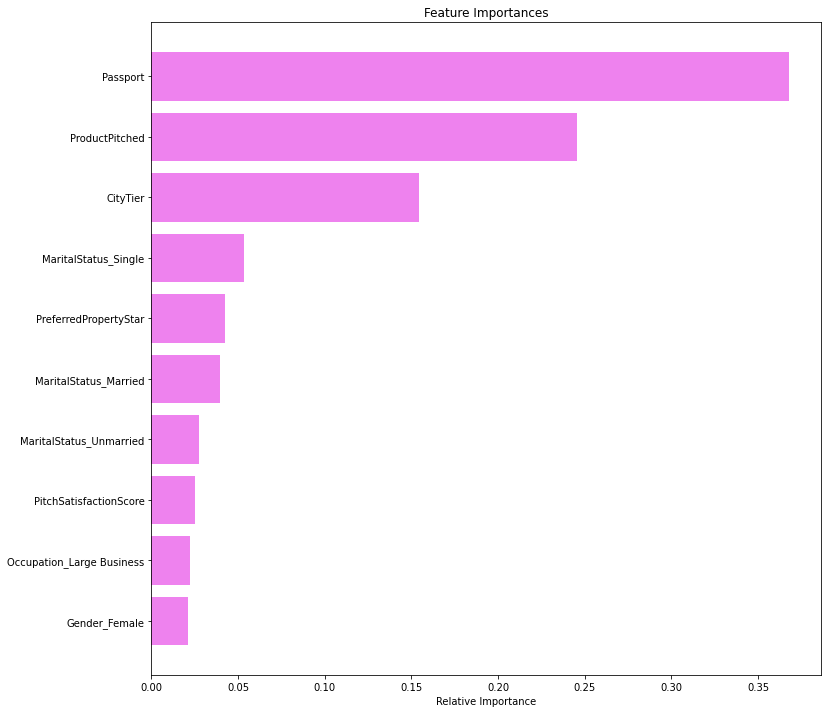

<IPython.core.display.Javascript object>

In [282]:
# Get the feature importance list
feature_names = X_train.columns
importances = dt_tuned.feature_importances_
indices = np.argsort(importances)

# create a dataframe of importance
importance_df = pd.DataFrame(
    dt_tuned.feature_importances_, columns=["Imp"], index=X_train.columns
).sort_values(by="Imp", ascending=False)

# print out the variables with non-zero importance
importance_df = importance_df[importance_df["Imp"] > 0]
print(importance_df)

# display the importances on a bar plot
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(
    range(importance_df.shape[0]),
    importance_df["Imp"].to_numpy(),
    color="violet",
    align="center",
)
plt.yticks(range(importance_df.shape[0]), importance_df.index.values)
plt.xlabel("Relative Importance")
plt.gca().invert_yaxis()
plt.show()


- ### Visualize the decision tree

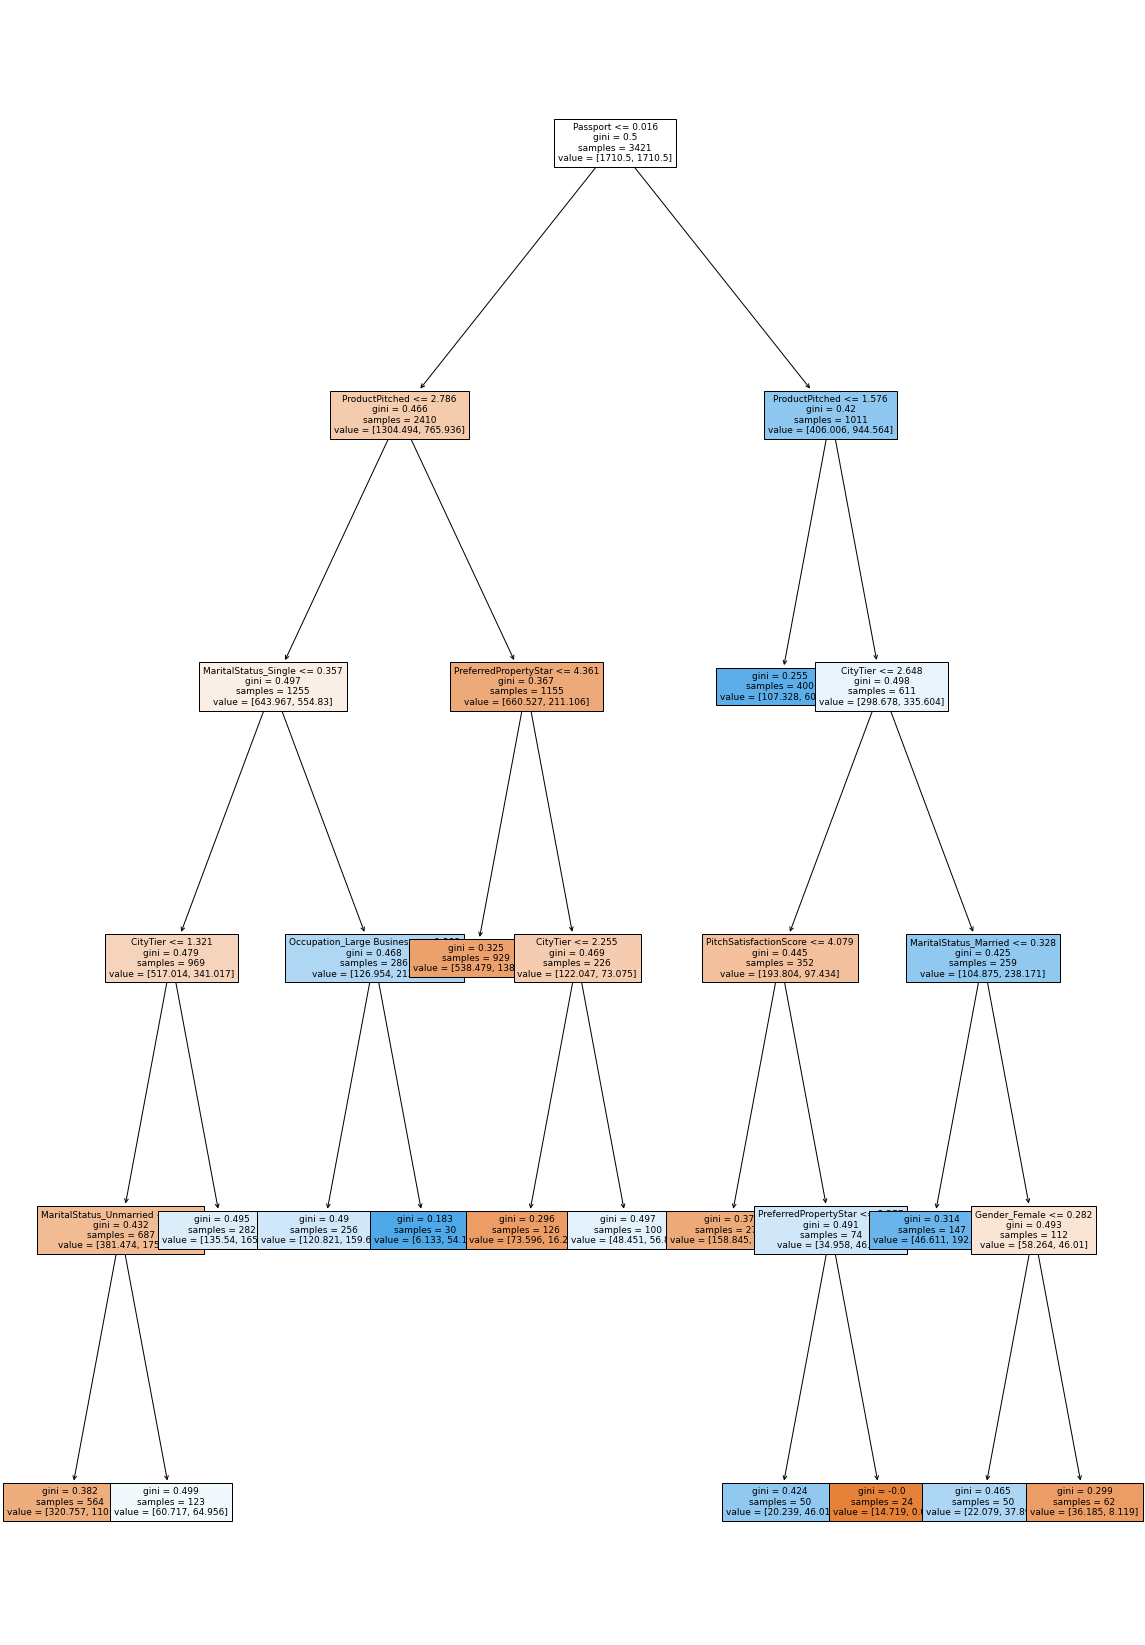

<IPython.core.display.Javascript object>

In [286]:
## creating a list of column names
feature_names = X_train.columns.to_list()

# Plot the decision tree
from sklearn import tree

plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    dt_tuned,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [287]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dt_tuned, feature_names=feature_names, show_weights=True))

|--- Passport <= 0.02
|   |--- ProductPitched <= 2.79
|   |   |--- MaritalStatus_Single <= 0.36
|   |   |   |--- CityTier <= 1.32
|   |   |   |   |--- MaritalStatus_Unmarried <= 0.95
|   |   |   |   |   |--- weights: [320.76, 110.97] class: 0
|   |   |   |   |--- MaritalStatus_Unmarried >  0.95
|   |   |   |   |   |--- weights: [60.72, 64.96] class: 1
|   |   |   |--- CityTier >  1.32
|   |   |   |   |--- weights: [135.54, 165.10] class: 1
|   |   |--- MaritalStatus_Single >  0.36
|   |   |   |--- Occupation_Large Business <= 0.87
|   |   |   |   |--- weights: [120.82, 159.68] class: 1
|   |   |   |--- Occupation_Large Business >  0.87
|   |   |   |   |--- weights: [6.13, 54.13] class: 1
|   |--- ProductPitched >  2.79
|   |   |--- PreferredPropertyStar <= 4.36
|   |   |   |--- weights: [538.48, 138.03] class: 0
|   |   |--- PreferredPropertyStar >  4.36
|   |   |   |--- CityTier <= 2.26
|   |   |   |   |--- weights: [73.60, 16.24] class: 0
|   |   |   |--- CityTier >  2.26
|   |   |  

<IPython.core.display.Javascript object>

- Customer having a passport has the most significant role in them buying the travel package
- The importance is then followed by ProductPitced and CityTier

Some observations:

- If the customer has the passport and ProductPitched is 1 or Basic the chances are pretty high that they will buy the package

- If the ProductPitched is fancier than basic, few other factors come into play,
    - if the CityTier of customer is 1, then the Pitch has to be really good (PitchSatisfactionScore >= 5)    - 
    - if the CityTier of customer is 2 or 3, then if they are not married or if married male they are more likely to buy the package


## 6. Summary and Business reccomendations

- ### Summary  <br>

    - We have tested and tuned non-boosted and boosted classifiers on the travel package customer dataset
    - We have done a pretty thorough analysis of predicting if a customer will purchase a travel package after a product is pitched to them
    - Our goal was to maximize recall in our models, hence reducing the amount of False Negatives, i.e. the customers who would have purchased the travel package but the model predicted that they won't. 
        - We were willing to sacrifice on having a bit larger number of False Positives in our predictions i.e. model predicts that the customer will purchase the travel package but actually they do not do that. 
    - Within each model, we have further tuned the hyperparameters and evolved it into a much more accurate tool.
    - For the non-boosted classifier category, we tried,
        - Decision Tree with default parameters and tuned
        - Random Forest with default parameters and tuned
        - Bagging Classifier with default parameters and tuned
    - For the boosted classifier category, we tried,
        - AdaBoost with default parameters and tuned
        - Gradient Boosting with default parameters and tuned
        - XGBoost with default parameters and tuned
    - We also tested Stacking Classifier with based estimators as Decision Tree, Random Forest, Bagging Classifier, AdaBoost & Gradient Boosting. The final estimator was XGBoost classifier
    
    - Out of all the algorithms, a **Tuned Decision Tree performed the best**
    
    - The most significant variable that impacts the chances of someone purchasing the travel package after the product is pitched to them, is if they hold a passport. 
    - The next important variables (in the order of significance) are, 
        - ProductPitched
        - CityTier
        - MaritalStatus
        - PreferredPropertyStar
        - PitchSatisfactionScore
        - Occupation
        - Gender
        
    - Based on our Decision Tree model we have carved out following scenarios where the customer will purchase a travel package
        - If the customer has the passport and ProductPitched is 1 or Basic the chances are pretty high that they will buy the package
        - If the ProductPitched is fancier than basic, few other factors come into play,
            - if the CityTier of customer is 1, then the Pitch has to be really good (PitchSatisfactionScore >= 5)    - 
            - if the CityTier of customer is 2 or 3, then if they are not married or if married male they are more likely to buy the package

- ### Business recommendations <br>

    - According to our model having a passport, product pitched to the csutomer and their City tier are some of the most important factor for getting a customer to buy the travel package <br><br>
        - To be more precise, the **most ideal profile of a customer** where **current travel package marketing campaign is highly successful** is, 
            - holds a passport, 
            - product pitched to them is basic<br><br>
            
        - As we try to break away from the ideal customer profile, we can tailor our travel package campaign towards prospective customers towards whom the current campaign would be moderately successful, for eg
            - if they have a passport, live in a 1 tier city, product pitched is higher than basic and then the pitch has to be really good
            - if they have a passport, the CityTier of customer is 2 or 3, and if they are not married or if married male 
            - if they don't have a passport, produc pitched to them is better than standard, preferred property start is greater than equal to 5 and they live in a CityTier 3 <br><br>
            
    - Based on EDA we also gained the information that,
        - The age of customers who took the package is relatively lower than customers who did not take the package 
        - More resources could be diverted towards the standard package as it shows significant returns on conversion from pitch to purchase
        - The longer the duration of pitch, more likely it is for the customer to accept the travel package
        - Company's strategy to approach customers with medium group size is on spot in terms proper allocation of marketing resources. Company can further channel bit more resources towards group size 2 and 4
        - Currently more marketing is done in CityTier 1, which has a lower conversion. So more resources could be diverted to CityTier 2 and 3   
        - Nearly 50% of marketing is focused on married customers where the pitch to purchase conversion is low. Focusing on unmarried and single customers can yield a better result on pitch to purchase conversion
        - Focusing on PreferredPropertyStar of 4 & 5 can yield a better result on pitch to purchase conversion
        - Focusing on Occupation of large and small business can yield a better result on pitch to purchase conversion 
        - Focusing on customers who have a passport can yield a better result on pitch to purchase conversion  
        - Increasing the follow ups by 1 or two can further increase the package sales   
        - Maybe focusing on customers designated as Senior Manager compared to customers designated as Managers can result in better sales